# Imports and paths

In [1]:
'''Importing the modules needed for the analysis... the core is th IDAT_Processor module 
   containing most of the needed functions and classes for the analysis'''
import os
from PIL import Image
import torch
import rpy2
import pandas as pd
import numpy as np
import xlrd
import rpy2
import methylcheck
import methylprep
import glob
import importlib
from rpy2.robjects import pandas2ri, numpy2ri
import rpy2.robjects as robjects
import IDAT_Processor, Methylr2pyPlotter, PhenoPreProcessor
from IDAT_Processor import PreProcessIDATs

In [2]:
''' Here we define the paths where the spreadsheets are or will eventually be saved to... 
    you need to adapt this of course '''

idat_dir='/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/' ## where the IDATS are

samplesheet='/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/850K_Demo_03.09.2020.xlsx' 
## where your excel or other spreadsheet type resides containing information about your IDATS 

phenosheet=output_sheet_name=idat_dir+'pheno_sheet.csv'
## the processed spreadsheet from above which will be processed (see below)

glob.glob('/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/*/*')
## just to sneak peek into the IDAT folder

['/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/BH190166-1/203712390068_R04C01_Grn.idat',
 '/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/BH190166-1/203712390068_R04C01_Red.idat',
 '/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/BH190166-1/203712390068_R05C01_Grn.idat',
 '/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/BH190166-1/203712390068_R05C01_Red.idat',
 '/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/BH190166-1/203712390068_R06C01_Grn.idat',
 '/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/BH190166-1/203712390068_R06C01_Red.idat',
 '/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/BH190166-1/203712390068_R07C01_Grn.idat',
 '/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/BH190166-1/203712390068_R07C01_Red.idat',
 '/home/Deep_Learner/private/Methyl_Arra

# Processing of  sample_sheet to generate the final phenosheet

## PreProcessing Illumina specific sample_sheet 

In [27]:
''' This section is if you have a samplesheet that matches the specific Ilumina specifications of a samplesheet...
in our case this is not the case but I will show you an example here which utilizes methylprep'''

' This section is if you have a samplesheet that matches the specific Ilumina specifications of a samplesheet...\nin our case this is not the case but I will show you an example here which utilizes methylprep'

In [4]:
sample_sheet_mp=methylprep.get_sample_sheet('/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/', filepath='/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/BH190166-1_Sample_Sheet.csv')

INFO:methylprep.files.sample_sheets:Parsing sample_sheet


In [5]:
###alternative method###
#sample_sheet_mp=methylprep.files.SampleSheet('/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/BH190166-1/BH190166-1_Sample_Sheet.csv','/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/BH190166-1/')

In [6]:
sample_sheet_mp._SampleSheet__data_frame

,Sample_Name,Sentrix_ID,Sentrix_Position,Sample_Group,Replicate,Parent1,Parent2,Sample_Name.1,Array_Plate,Well,Start_Date,Operter
0,Np1700538-3abs,203712390068,R04C01,g1,,,,,P7,G04,20200106,RJ
1,Np1700538-5nor,203712390068,R05C01,g2,,,,,P7,G05,20200106,RJ
2,NP1400133-12babs,203712390068,R06C01,g1,,,,,P7,G06,20200106,RJ
3,NP1400133-8bnor,203712390068,R07C01,g2,,,,,P7,G07,20200106,RJ
4,Np1400464-A4abs,203712390068,R08C01,g1,,,,,P7,G08,20200106,RJ
5,Np1400464-A8nor,203789410114,R01C01,g2,,,,,P7,G09,20200106,RJ
6,NP1500276-10abs,203789410114,R02C01,g1,,,,,P7,G10,20200106,RJ
7,NP1500276-6nor,203789410114,R03C01,g2,,,,,P7,G11,20200106,RJ
8,NP6564-7abs,203789410114,R04C01,g1,,,,,P7,G12,20200106,RJ
9,NP6564-5nor,203789410114,R05C01,g2,,,,,P7,H01,20200106,RJ


In [32]:
sample_sheet_mp._SampleSheet__data_frame.to_csv('/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/bejing.csv', index=False)

In [33]:
samplesheet='/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/bejing.csv';pd.read_csv(samplesheet)

,Sample_Name,Sentrix_ID,Sentrix_Position,Sample_Group,Replicate,Parent1,Parent2,Sample_Name.1,Array_Plate,Well,Start_Date,Operter
0,Np1700538-3abs,203712390068,R04C01,g1,NaN,NaN,NaN,NaN,P7,G04,20200106,RJ
1,Np1700538-5nor,203712390068,R05C01,g2,NaN,NaN,NaN,NaN,P7,G05,20200106,RJ
2,NP1400133-12babs,203712390068,R06C01,g1,NaN,NaN,NaN,NaN,P7,G06,20200106,RJ
3,NP1400133-8bnor,203712390068,R07C01,g2,NaN,NaN,NaN,NaN,P7,G07,20200106,RJ
4,Np1400464-A4abs,203712390068,R08C01,g1,NaN,NaN,NaN,NaN,P7,G08,20200106,RJ
5,Np1400464-A8nor,203789410114,R01C01,g2,NaN,NaN,NaN,NaN,P7,G09,20200106,RJ
6,NP1500276-10abs,203789410114,R02C01,g1,NaN,NaN,NaN,NaN,P7,G10,20200106,RJ
7,NP1500276-6nor,203789410114,R03C01,g2,NaN,NaN,NaN,NaN,P7,G11,20200106,RJ
8,NP6564-7abs,203789410114,R04C01,g1,NaN,NaN,NaN,NaN,P7,G12,20200106,RJ
9,NP6564-5nor,203789410114,R05C01,g2,NaN,NaN,NaN,NaN,P7,H01,20200106,RJ


In [7]:
''' We will now process the sample sheet to generate our phenosheet for further analysis... as we have a custom sampleheet we 
    need to process it with the custom processing method... but lets see'''
#import Mehtylr2py
from PhenoPreProcessor import PreProcessPhenoData

In [8]:
phenodata=PreProcessPhenoData(pheno_sheet=samplesheet, idat_dir=idat_dir, header_line=0)

In [9]:
from pathlib import Path
if Path(samplesheet).suffix=='.csv': 
    print('processing .csv file')
    pheno_sheet = pd.read_csv(samplesheet,header=0)
elif Path(samplesheet).suffix=='.xlsx':
    print('processing .xlsx file')
    pheno_sheet = pd.read_excel(samplesheet,header=0)

processing .xlsx file


In [10]:
pheno_sheet.head()

,ID,ID_MATERIAL_TYP,txt_idat,ALTER OP,ALTER Beginn,DAUER,Dauer Gruppe,Dauer_Gruppe_cat,SUPPLIER_NUMBER,Lokalisation,...,PATIENT_GESCHLECHT,KLINIK,icEEG,DNA Cluster,txt_KOMMENTAR,PATIENT_NACHNAME,PATIENT_VORNAME,dat_PATIENT_GEBURTSTAG,v11b4_MaxCalScore,v11b4_MaxCalDiag
0,132012,54958.0,202818860023_R01C01,33.0,0.0,0.0,0,0,SN 16/17 IV,occipital - NCx,...,m,UKER,NaN,FFPE,Forschungsproben Prof. Blümcke Erlangen;Landou...,"SN 16/17 (I,IV)",UKER,0.0,"0,0222","methylation class control tissue, inflammatory"
1,132014,54959.0,202818860023_R02C01,33.0,0.0,0.0,0,0,SN 16/17 IV,occipital - WM,...,m,UKER,NaN,FFPE,Forschungsproben Prof. Blümcke Erlangen;Landou...,"SN 16/17 (I,IV)",UKER,0.0,"0,08",methylation class lymphoma
2,131972,54938.0,202818860053_R04C01,11.0,0.0,0.0,0,0,SN 83/10 III,temporal - NCx,...,f,UKER,NaN,FFPE,Forschungsproben Prof. Blümcke Erlangen; Dyspn...,SN 83/10 III,UKER,0.0,"0,4535","methylation class control tissue, hemispheric ..."
3,131974,54939.0,202818860053_R05C01,11.0,0.0,0.0,0,0,SN 83/10 III,temporal - WM,...,f,UKER,NaN,FFPE,Forschungsproben Prof. Blümcke Erlangen; Dyspn...,SN 83/10 III,UKER,0.0,"0,0147",methylation class embryonal tumor with multila...
4,131976,54940.0,202818860053_R06C01,27.0,0.0,0.0,0,0,SN 120/16 III,temporal - NCx,...,m,UKER,NaN,FFPE,Forschungsproben Prof. Blümcke Erlangen; Lunge...,"SN 120/16 (III, I)",UKER,0.0,"0,2614","methylation class control tissue, hemispheric ..."


In [11]:
pheno_sheet.keys()

Index(['ID', 'ID_MATERIAL_TYP', 'txt_idat', 'ALTER OP', 'ALTER Beginn',
       'DAUER', 'Dauer Gruppe', 'Dauer_Gruppe_cat', 'SUPPLIER_NUMBER',
       'Lokalisation', 'Lokalisation Gruppe', 'Stanze richtig',
       'Lokalisation Cluster', 'OP_DATUM', 'Einsenderdiagnose', 'Diagnosis',
       'Methylation_Class', 'Cluster DX', 'Methylation class family',
       'Panel 1', 'Panel 2', 'Panel 3', 'Panel 4', 'Panel 5',
       'PATIENT_GESCHLECHT', 'KLINIK', 'icEEG', 'DNA Cluster', 'txt_KOMMENTAR',
       'PATIENT_NACHNAME', 'PATIENT_VORNAME', 'dat_PATIENT_GEBURTSTAG',
       'v11b4_MaxCalScore', 'v11b4_MaxCalDiag'],
      dtype='object')

## Ilumina specific processing method  to generate the final phenosheet

In [ ]:
''' If you have a Illumina specific sample_sheet this is the way to further process it here'''

In [38]:
phenodata.combine_columns(first_column='Sentrix_ID', second_column='Sentrix_Position', column_name='txt_idat', seperator='_')

,Sample_Name,Sentrix_ID,Sentrix_Position,Sample_Group,Replicate,Parent1,Parent2,Sample_Name.1,Array_Plate,Well,Start_Date,Operter,txt_idat
0,Np1700538-3abs,203712390068,R04C01,g1,NaN,NaN,NaN,NaN,P7,G04,20200106,RJ,203712390068_R04C01
1,Np1700538-5nor,203712390068,R05C01,g2,NaN,NaN,NaN,NaN,P7,G05,20200106,RJ,203712390068_R05C01
2,NP1400133-12babs,203712390068,R06C01,g1,NaN,NaN,NaN,NaN,P7,G06,20200106,RJ,203712390068_R06C01
3,NP1400133-8bnor,203712390068,R07C01,g2,NaN,NaN,NaN,NaN,P7,G07,20200106,RJ,203712390068_R07C01
4,Np1400464-A4abs,203712390068,R08C01,g1,NaN,NaN,NaN,NaN,P7,G08,20200106,RJ,203712390068_R08C01
5,Np1400464-A8nor,203789410114,R01C01,g2,NaN,NaN,NaN,NaN,P7,G09,20200106,RJ,203789410114_R01C01
6,NP1500276-10abs,203789410114,R02C01,g1,NaN,NaN,NaN,NaN,P7,G10,20200106,RJ,203789410114_R02C01
7,NP1500276-6nor,203789410114,R03C01,g2,NaN,NaN,NaN,NaN,P7,G11,20200106,RJ,203789410114_R03C01
8,NP6564-7abs,203789410114,R04C01,g1,NaN,NaN,NaN,NaN,P7,G12,20200106,RJ,203789410114_R04C01
9,NP6564-5nor,203789410114,R05C01,g2,NaN,NaN,NaN,NaN,P7,H01,20200106,RJ,203789410114_R05C01


In [39]:
phenodata.combine_columns(first_column='Sample_Name', second_column='txt_idat', column_name='ID', seperator='.')

,Sample_Name,Sentrix_ID,Sentrix_Position,Sample_Group,Replicate,Parent1,Parent2,Sample_Name.1,Array_Plate,Well,Start_Date,Operter,txt_idat,ID
0,Np1700538-3abs,203712390068,R04C01,g1,NaN,NaN,NaN,NaN,P7,G04,20200106,RJ,203712390068_R04C01,Np1700538-3abs.203712390068_R04C01
1,Np1700538-5nor,203712390068,R05C01,g2,NaN,NaN,NaN,NaN,P7,G05,20200106,RJ,203712390068_R05C01,Np1700538-5nor.203712390068_R05C01
2,NP1400133-12babs,203712390068,R06C01,g1,NaN,NaN,NaN,NaN,P7,G06,20200106,RJ,203712390068_R06C01,NP1400133-12babs.203712390068_R06C01
3,NP1400133-8bnor,203712390068,R07C01,g2,NaN,NaN,NaN,NaN,P7,G07,20200106,RJ,203712390068_R07C01,NP1400133-8bnor.203712390068_R07C01
4,Np1400464-A4abs,203712390068,R08C01,g1,NaN,NaN,NaN,NaN,P7,G08,20200106,RJ,203712390068_R08C01,Np1400464-A4abs.203712390068_R08C01
5,Np1400464-A8nor,203789410114,R01C01,g2,NaN,NaN,NaN,NaN,P7,G09,20200106,RJ,203789410114_R01C01,Np1400464-A8nor.203789410114_R01C01
6,NP1500276-10abs,203789410114,R02C01,g1,NaN,NaN,NaN,NaN,P7,G10,20200106,RJ,203789410114_R02C01,NP1500276-10abs.203789410114_R02C01
7,NP1500276-6nor,203789410114,R03C01,g2,NaN,NaN,NaN,NaN,P7,G11,20200106,RJ,203789410114_R03C01,NP1500276-6nor.203789410114_R03C01
8,NP6564-7abs,203789410114,R04C01,g1,NaN,NaN,NaN,NaN,P7,G12,20200106,RJ,203789410114_R04C01,NP6564-7abs.203789410114_R04C01
9,NP6564-5nor,203789410114,R05C01,g2,NaN,NaN,NaN,NaN,P7,H01,20200106,RJ,203789410114_R05C01,NP6564-5nor.203789410114_R05C01


In [40]:
''' Final processing of the sample_sheet to produce our final phenosheet... we here define our final 
    coulumns which are actually needed for the further analysis'''

pheno_sheet=phenodata.format_custom(
              basename_col='txt_idat', 
              disease_class_column='Sample_Group',
              include_columns={'txt_idat':'identifier',
                                 'Sample_Name':'Sample_Name',   
                                 'ID': 'ID',

                                          }
                       )

In [41]:
pheno_sheet

,Basename,Batchnum,ID,Sample_Name,disease,identifier
0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b203712390068,Np1700538-3abs.203712390068_R04C01,Np1700538-3abs,g1,203712390068_R04C01
1,/home/Deep_Learner/private/Methyl_Array/Katja_...,b203712390068,Np1700538-5nor.203712390068_R05C01,Np1700538-5nor,g2,203712390068_R05C01
2,/home/Deep_Learner/private/Methyl_Array/Katja_...,b203712390068,NP1400133-12babs.203712390068_R06C01,NP1400133-12babs,g1,203712390068_R06C01
3,/home/Deep_Learner/private/Methyl_Array/Katja_...,b203712390068,NP1400133-8bnor.203712390068_R07C01,NP1400133-8bnor,g2,203712390068_R07C01
4,/home/Deep_Learner/private/Methyl_Array/Katja_...,b203712390068,Np1400464-A4abs.203712390068_R08C01,Np1400464-A4abs,g1,203712390068_R08C01
5,/home/Deep_Learner/private/Methyl_Array/Katja_...,b203789410114,Np1400464-A8nor.203789410114_R01C01,Np1400464-A8nor,g2,203789410114_R01C01
6,/home/Deep_Learner/private/Methyl_Array/Katja_...,b203789410114,NP1500276-10abs.203789410114_R02C01,NP1500276-10abs,g1,203789410114_R02C01
7,/home/Deep_Learner/private/Methyl_Array/Katja_...,b203789410114,NP1500276-6nor.203789410114_R03C01,NP1500276-6nor,g2,203789410114_R03C01
8,/home/Deep_Learner/private/Methyl_Array/Katja_...,b203789410114,NP6564-7abs.203789410114_R04C01,NP6564-7abs,g1,203789410114_R04C01
9,/home/Deep_Learner/private/Methyl_Array/Katja_...,b203789410114,NP6564-5nor.203789410114_R05C01,NP6564-5nor,g2,203789410114_R05C01


## Self formatted specific processing method to generate the final phenosheet

In [5]:
''' We will now process the sample sheet to generate our phenosheet for further analysis... as we have a custom sampleheet we 
    need to process it with the custom processing method... but lets see'''
from PhenoPreProcessor import PreProcessPhenoData

In [6]:
phenodata=PreProcessPhenoData(pheno_sheet=samplesheet, idat_dir=idat_dir, header_line=0)

In [7]:
from pathlib import Path
if Path(samplesheet).suffix=='.csv': 
    print('processing .csv file')
    pheno_sheet = pd.read_csv(samplesheet,header=0)
elif Path(samplesheet).suffix=='.xlsx':
    print('processing .xlsx file')
    pheno_sheet = pd.read_excel(samplesheet,header=0)

processing .xlsx file


In [8]:
pheno_sheet.head()

,ID,ID_MATERIAL_TYP,txt_idat,ALTER OP,ALTER Beginn,DAUER,Dauer Gruppe,Dauer_Gruppe_cat,SUPPLIER_NUMBER,Lokalisation,...,PATIENT_GESCHLECHT,KLINIK,icEEG,DNA Cluster,txt_KOMMENTAR,PATIENT_NACHNAME,PATIENT_VORNAME,dat_PATIENT_GEBURTSTAG,v11b4_MaxCalScore,v11b4_MaxCalDiag
0,132012,54958.0,202818860023_R01C01,33.0,0.0,0.0,0,0,SN 16/17 IV,occipital - NCx,...,m,UKER,NaN,FFPE,Forschungsproben Prof. Blümcke Erlangen;Landou...,"SN 16/17 (I,IV)",UKER,0.0,"0,0222","methylation class control tissue, inflammatory"
1,132014,54959.0,202818860023_R02C01,33.0,0.0,0.0,0,0,SN 16/17 IV,occipital - WM,...,m,UKER,NaN,FFPE,Forschungsproben Prof. Blümcke Erlangen;Landou...,"SN 16/17 (I,IV)",UKER,0.0,"0,08",methylation class lymphoma
2,131972,54938.0,202818860053_R04C01,11.0,0.0,0.0,0,0,SN 83/10 III,temporal - NCx,...,f,UKER,NaN,FFPE,Forschungsproben Prof. Blümcke Erlangen; Dyspn...,SN 83/10 III,UKER,0.0,"0,4535","methylation class control tissue, hemispheric ..."
3,131974,54939.0,202818860053_R05C01,11.0,0.0,0.0,0,0,SN 83/10 III,temporal - WM,...,f,UKER,NaN,FFPE,Forschungsproben Prof. Blümcke Erlangen; Dyspn...,SN 83/10 III,UKER,0.0,"0,0147",methylation class embryonal tumor with multila...
4,131976,54940.0,202818860053_R06C01,27.0,0.0,0.0,0,0,SN 120/16 III,temporal - NCx,...,m,UKER,NaN,FFPE,Forschungsproben Prof. Blümcke Erlangen; Lunge...,"SN 120/16 (III, I)",UKER,0.0,"0,2614","methylation class control tissue, hemispheric ..."


In [9]:
pheno_sheet.keys()

Index(['ID', 'ID_MATERIAL_TYP', 'txt_idat', 'ALTER OP', 'ALTER Beginn',
       'DAUER', 'Dauer Gruppe', 'Dauer_Gruppe_cat', 'SUPPLIER_NUMBER',
       'Lokalisation', 'Lokalisation Gruppe', 'Stanze richtig',
       'Lokalisation Cluster', 'OP_DATUM', 'Einsenderdiagnose', 'Diagnosis',
       'Methylation_Class', 'Cluster DX', 'Methylation class family',
       'Panel 1', 'Panel 2', 'Panel 3', 'Panel 4', 'Panel 5',
       'PATIENT_GESCHLECHT', 'KLINIK', 'icEEG', 'DNA Cluster', 'txt_KOMMENTAR',
       'PATIENT_NACHNAME', 'PATIENT_VORNAME', 'dat_PATIENT_GEBURTSTAG',
       'v11b4_MaxCalScore', 'v11b4_MaxCalDiag'],
      dtype='object')

In [8]:
pheno_sheet=phenodata.format_custom(
              basename_col='txt_idat', 
              disease_class_column='Diagnosis', 
              include_columns={'ALTER Beginn':'age_onset',
                               'ALTER OP':'age_surgery',
                               'DAUER':'duration',                               
                               #'Lokalisation':'localisation', 
                               'Einsenderdiagnose':'long_diagnosis',
                               'KLINIK':'center',
                               'PATIENT_GESCHLECHT':'sex',
                               'SUPPLIER_NUMBER':'case_ID', 
                               'txt_idat':'identifier',
                               'Dauer Gruppe': 'duration_group',
                               'Dauer_Gruppe_cat': 'duration_group_cat',
                               'Lokalisation Gruppe': 'location_wm_cx',
                               'Lokalisation Cluster': 'location_region',
                               'Cluster DX':'disease_diagnosis',
                               'Stanze richtig': 'DNA_region_extraction_verified', 
                               'Methylation class family':'Methylation_Class',
                               'Diagnosis':'short_diagnosis'
                               
                              }
                       )

Check whether your input data at the "sex"-column contains M for male and/ or F for Female


In [9]:
phenodata.format_sex_column('m','f')

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01
101,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01
102,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01
103,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01


In [10]:
phenodata.combine_columns(first_column='disease', second_column='identifier')

You did not specify a column name... using default value and creating "ID" column


,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01,Control - NCx.202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01,Control - WM.202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01
101,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01
102,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01
103,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01


In [11]:
''' Lets look for missing values... we will impute that missing data'''
phenodata.pheno_sheet.isnull().sum()


age_onset                         0
age_surgery                       0
Basename                          0
Batchnum                          0
disease_diagnosis                 0
duration                          0
duration_group                    0
duration_group_cat                0
short_diagnosis                   0
long_diagnosis                    0
center                            0
location_region                   9
location_wm_cx                    9
Methylation_Class                 0
sex                               0
case_ID                           0
DNA_region_extraction_verified    9
disease                           0
identifier                        0
ID                                0
dtype: int64

In [12]:
keys=['age_surgery','center', 'location_region','location_wm_cx', 'sex','duration','age_onset']## columns to impute missing data

In [13]:
imputation_df=phenodata.pheno_sheet[keys]; imputation_df

,age_surgery,center,location_region,location_wm_cx,sex,duration,age_onset
0,33.0,UKER,occipital,Cortex,M,0.0,0.0
1,33.0,UKER,occipital,Marklager,M,0.0,0.0
2,11.0,UKER,temporal,Cortex,F,0.0,0.0
3,11.0,UKER,temporal,Marklager,F,0.0,0.0
4,27.0,UKER,temporal,Cortex,M,0.0,0.0
...,...,...,...,...,...,...,...
100,68.0,Mara,temporal,Cortex,F,63.0,5.0
101,40.0,Mara,temporal,Cortex,M,25.0,15.0
102,26.0,Mara,temporal,Cortex,M,10.0,16.0
103,33.0,Mara,temporal,Cortex,F,28.0,5.0


In [14]:
'''simple imputation strategy... could be more clever'''
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
#from sklearn.impute import KNNImputer
#imp = KNNImputer(n_neighbors=2, weights="uniform")
imp.fit(imputation_df)
test_pheno=pd.DataFrame(imp.transform(imputation_df),index = imputation_df.index.to_numpy(),
                  columns=imputation_df.columns)
#imputed=imp.transform(phenodata.pheno_sheet)    
test_pheno.isnull().sum()

age_surgery        0
center             0
location_region    0
location_wm_cx     0
sex                0
duration           0
age_onset          0
dtype: int64

In [15]:
''' Write the imputed data to the original dataframe'''
phenodata.pheno_sheet[keys]=test_pheno.to_numpy()

In [16]:
phenodata.pheno_sheet.head()

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01,Control - NCx.202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01,Control - WM.202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01


In [17]:
phenodata.pheno_sheet=phenodata.pheno_sheet[phenodata.pheno_sheet['Methylation_Class'].notnull()];phenodata.pheno_sheet

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01,Control - NCx.202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01,Control - WM.202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01
101,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01
102,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01
103,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01


In [18]:
phenodata.pheno_sheet.isnull().sum()### looks good now

age_onset                         0
age_surgery                       0
Basename                          0
Batchnum                          0
disease_diagnosis                 0
duration                          0
duration_group                    0
duration_group_cat                0
short_diagnosis                   0
long_diagnosis                    0
center                            0
location_region                   0
location_wm_cx                    0
Methylation_Class                 0
sex                               0
case_ID                           0
DNA_region_extraction_verified    9
disease                           0
identifier                        0
ID                                0
dtype: int64

In [19]:
phenodata.pheno_sheet.disease.unique()

array(['Control - NCx', 'Control - WM', 'FCD 2A', 'FCD 2B', 'HME', 'PMG',
       'TLE/CTRL'], dtype=object)

In [20]:
phenodata.pheno_sheet.Methylation_Class.unique()

array(['CTRL NCx', 'CTRL WM', 'FCD 2', 'Hemispheric', 'TLE'], dtype=object)

In [21]:
phenodata.pheno_sheet['disease'].unique().tolist()

['Control - NCx', 'Control - WM', 'FCD 2A', 'FCD 2B', 'HME', 'PMG', 'TLE/CTRL']

In [22]:
exclude_disease_list=[
        'unknown', 
 
 'leave',   
   
    
 ]


In [23]:
phenodata.pheno_sheet=phenodata.pheno_sheet[~phenodata.pheno_sheet['disease'].isin(exclude_disease_list)];phenodata.pheno_sheet

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01,Control - NCx.202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01,Control - WM.202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01
101,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01
102,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01
103,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01


In [24]:
phenodata.pheno_sheet=phenodata.pheno_sheet[~phenodata.pheno_sheet['Methylation_Class'].isin(exclude_disease_list)];phenodata.pheno_sheet

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01,Control - NCx.202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01,Control - WM.202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01
101,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01
102,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01
103,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01


In [25]:
phenodata.pheno_sheet=phenodata.pheno_sheet[~phenodata.pheno_sheet['disease_diagnosis'].isin(exclude_disease_list)];phenodata.pheno_sheet

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01,Control - NCx.202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01,Control - WM.202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01
101,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01
102,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01
103,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01


In [26]:
center_list=['UKER', 'VGT', 'Mara','Erlangen', 'UKER ']

In [27]:
phenodata.pheno_sheet.center.unique()

array(['UKER', 'Mara', 'VGT', 'UKER ', 'Erlangen'], dtype=object)

In [28]:
phenodata.pheno_sheet.keys()

Index(['age_onset', 'age_surgery', 'Basename', 'Batchnum', 'disease_diagnosis',
       'duration', 'duration_group', 'duration_group_cat', 'short_diagnosis',
       'long_diagnosis', 'center', 'location_region', 'location_wm_cx',
       'Methylation_Class', 'sex', 'case_ID', 'DNA_region_extraction_verified',
       'disease', 'identifier', 'ID'],
      dtype='object')

In [29]:
phenodata.pheno_sheet=phenodata.pheno_sheet[phenodata.pheno_sheet['center'].isin(center_list)];phenodata.pheno_sheet

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01,Control - NCx.202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01,Control - WM.202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01
101,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01
102,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01
103,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01


In [30]:
phenodata.remove_diseases(exclude_disease_list)

In [31]:
phenodata.pheno_sheet['Methylation_Class'].unique().tolist()

['CTRL NCx', 'CTRL WM', 'FCD 2', 'Hemispheric', 'TLE']

## Common trunk of phenosheet processing

In [32]:
phenodata.pheno_sheet

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01,Control - NCx.202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01,Control - WM.202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01
101,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01
102,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01
103,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01


In [33]:
phenodata.export(output_sheet_name)

Next Step: Please move all other sample sheets out of this directory.


In [10]:
pd.read_csv(phenosheet, index_col=False)

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01,Control - NCx.202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01,Control - WM.202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01
101,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01
102,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01
103,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01


In [35]:
pd.read_csv(phenosheet, index_col=False)['Methylation_Class'].unique()

array(['CTRL NCx', 'CTRL WM', 'FCD 2', 'Hemispheric', 'TLE'], dtype=object)

In [36]:
pd.read_csv(phenosheet, index_col=False)#.keys()

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01,Control - NCx.202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01,Control - WM.202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01
101,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01
102,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01
103,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01


# IDAT Processing modified class

## Loading data

In [11]:
import IDAT_Processor
from IDAT_Processor import PreProcessIDATs

In [12]:
preproidat=PreProcessIDATs(idat_dir=idat_dir)

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: No methods found in package ‘RSQLite’ for request: ‘dbListFields’ when loading ‘lumi’

  warnings.warn(x, RRuntimeWarning)


In [13]:
import multiprocessing
n_workers=multiprocessing.cpu_count()
preproidat.load_idats(use_cache=False, rename_samples=True, parallel=True, nworkers=n_workers, verbose=True)

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: [read.metharray.sheet] Found the following CSV files:

  warnings.warn(x, RRuntimeWarning)


[1]
 "/home/Deep_Learner/private/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS//pheno_sheet.csv"


Reading multiple idat-files in parallel
Combining the RGsets to one big RGset


/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [14]:
pandas2ri.ri2py(preproidat.pheno)

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01,Control - NCx.202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01,Control - WM.202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01
101,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01
102,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01
103,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01


In [43]:
preproidat.ri2py_dataframe(preproidat.pheno,matrix=True)

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,center,location_region,location_wm_cx,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID
0,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,occipital,Cortex,CTRL NCx,M,SN 16/17 IV,ja,Control - NCx,202818860023_R01C01,Control - NCx.202818860023_R01C01
1,0.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860023,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,occipital,Marklager,CTRL WM,M,SN 16/17 IV,ja,Control - WM,202818860023_R02C01,Control - WM.202818860023_R02C01
2,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01
3,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,UKER,temporal,Marklager,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,UKER,temporal,Cortex,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01
101,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01
102,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01
103,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,Mara,temporal,Cortex,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01


## Quality control plots

In [44]:
#### MDS plot to see interrelations of the data
#### analysis the loaded RGset and plots the beta values obtained via the getBeta() minfi package function
%matplotlib notebook
preproidat.plt_mds(top=1000, n_components=2, group='sex', components=(0,1))

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: IlluminaHumanMethylationEPICmanifest

  warnings.warn(x, RRuntimeWarning)


Loading BokehJS ...

In [45]:
%matplotlib notebook
#thresh=12
preproidat.plt_mu(hue='Methylation_Class', thresh=10)     

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Loading BokehJS ...

In [46]:
# examine mean detection p-values across all samples to identify any failed samples
%matplotlib notebook
###########to_do##############
preproidat.plt_meandetP(detPcut=0.01, SampleCutoff=0.1, plot='all', RGset=None)

This may take a while
Almost done!


Loading BokehJS ...

In [47]:
%matplotlib notebook
preproidat.plt_failedbeads(RGset=preproidat.RGset, percent=True)

Loading BokehJS ...

## Computing the raw beta and Mvalues 

In [48]:
mvals_raw,mvals= preproidat.getM(preproidat.RGset_orig)
betas_raw,betas= preproidat.getBeta(preproidat.RGset_orig)

In [49]:
betas_raw

,Control - NCx.202818860023_R01C01,Control - WM.202818860023_R02C01,Control - NCx.202818860053_R04C01,Control - WM.202818860053_R05C01,Control - NCx.202818860053_R06C01,Control - WM.202818860053_R07C01,Control - NCx.202818860053_R08C01,Control - WM.202931510124_R01C01,Control - NCx.202931510124_R02C01,Control - WM.202931510124_R03C01,...,TLE/CTRL.202148010058_R03C01,TLE/CTRL.202148010058_R04C01,TLE/CTRL.202148010058_R05C01,TLE/CTRL.202148010058_R06C01,TLE/CTRL.202148010058_R07C01,TLE/CTRL.202148010058_R08C01,TLE/CTRL.202148010059_R01C01,TLE/CTRL.202148010059_R02C01,TLE/CTRL.202148010059_R03C01,TLE/CTRL.202148010059_R04C01
cg18478105,0.327759,0.462963,0.089603,0.176978,0.118012,0.150389,0.045726,0.109833,0.232262,0.181175,...,0.069997,0.075784,0.074445,0.064588,0.078413,0.121047,0.066322,0.080279,0.062159,0.062625
cg09835024,0.381323,0.403226,0.354280,0.300313,0.391017,0.493066,0.343046,0.293994,0.534247,0.434028,...,0.082906,0.051534,0.060599,0.129242,0.128249,0.125719,0.075403,0.089011,0.054643,0.104557
cg14361672,0.467456,0.434109,0.692208,0.673436,0.694662,0.775500,0.672014,0.722476,0.676000,0.566412,...,0.799799,0.751809,0.848749,0.736855,0.850977,0.734427,0.795213,0.806564,0.777944,0.833940
cg01763666,0.606218,0.453608,0.734434,0.593443,0.848684,0.793026,0.853166,0.742077,0.598881,0.618403,...,0.856760,0.856969,0.846988,0.835848,0.833533,0.778389,0.927183,0.935664,0.912922,0.885492
cg12950382,0.615658,0.524242,0.891518,0.845898,0.871664,0.758794,0.778530,0.896312,0.759971,0.852079,...,0.812958,0.857671,0.860997,0.885138,0.877576,0.789332,0.887453,0.875742,0.849479,0.886479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23079522,0.333333,0.342593,0.778163,0.439324,0.676829,0.314706,0.538620,0.650000,0.278729,0.334545,...,0.708216,0.625383,0.713587,0.656397,0.593361,0.500843,0.607164,0.689406,0.668950,0.670198
cg16818145,0.628866,0.481781,0.812054,0.688448,0.568184,0.802854,0.838184,0.817285,0.666463,0.784462,...,0.723249,0.834531,0.748631,0.830924,0.823254,0.829510,0.727903,0.694265,0.791764,0.673050
cg14585103,0.350598,0.446043,0.721057,0.612717,0.758491,0.512712,0.416058,0.730871,0.692913,0.446875,...,0.785974,0.858382,0.783033,0.692076,0.831858,0.761795,0.773998,0.760393,0.700615,0.747752
cg10633746,0.283276,0.186508,0.061669,0.120507,0.098711,0.129550,0.105791,0.076689,0.184250,0.251016,...,0.051403,0.044837,0.082493,0.064313,0.064297,0.064020,0.050095,0.036812,0.039159,0.040588


<IPython.core.display.Javascript object>


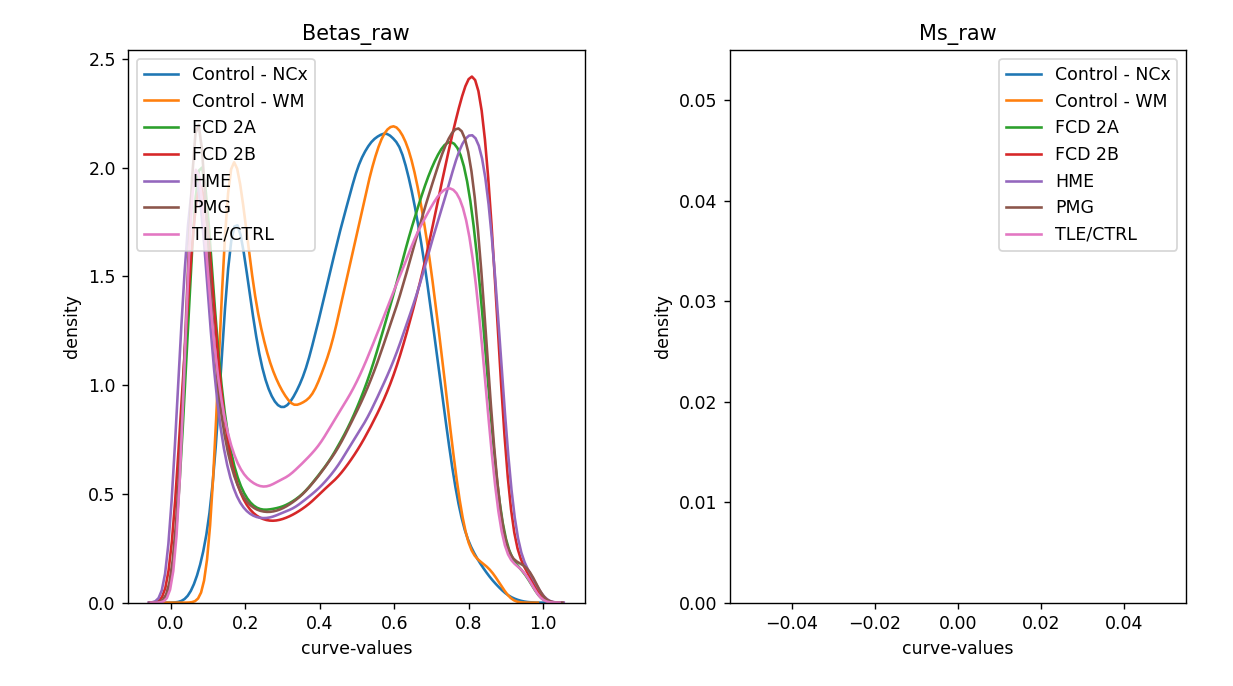

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/seaborn/distributio

In [50]:
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw}, variant="grouped", group_by='disease', nrows=1)

In [51]:
%matplotlib notebook
preproidat.screeplot(RGset=preproidat.RGset, nmax=10)

Loading BokehJS ...

## Normalizing data

In [52]:
### Quantile Normalization###--> we will use this method from the minfi package 
GRset,pheno=preproidat.preprocessQuantile(celltype_adoption=True, use_cell_count2=False, RGset=preproidat.RGset_orig)

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: [preprocessQuantile] Mapping to genome.

  warnings.warn(x, RRuntimeWarning)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: IlluminaHumanMethylationEPICanno.ilm10b4.hg19

  warnings.warn(x, RRuntimeWarning)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: [preprocessQuantile] Fixing outliers.

  warnings.warn(x, RRuntimeWarning)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: [preprocessQuantile] Quantile normalizing.

  warnings.warn(x, RRuntimeWarning)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: IlluminaHumanMethylation450kmanifest

  warnings.warn(x, RRuntimeWarning)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-

In [ ]:
''' Funnorm Normalization ### here we have other implementations as well the minfi funnorm nomalization method'''
#GRset, pheno =preproidat.preprocessFunnorm(celltype_adoption=True, use_cell_count2=True, nPCs=4, RGset=preproidat.RGset_orig)

In [180]:
''' Noob Normalization ### and the noob method as well'''
GRset,pheno=preproidat.preprocessNoob(celltype_adoption=True, use_cell_count2=False, nPCs=4, RGset=preproidat.RGset_orig)

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: [dyeCorrection] Applying R/G ratio flip to fix dye bias

  warnings.warn(x, RRuntimeWarning)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: [estimateCellCounts] Combining user data with reference (flow sorted) data.


  warnings.warn(x, RRuntimeWarning)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: [estimateCellCounts] Processing user and reference data together.


  warnings.warn(x, RRuntimeWarning)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: [estimateCellCounts] Picking probes for composition estimation.


  warnings.warn(x, RRuntimeWarning)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: [estimateCellCounts] Estimating composition.


  warnings.warn(x, RRunti

## Filtering of probes and samples 

### DNAmArray Pipeline

In [181]:
''' This is a big function which enables the user to control many paramters for the final processing od beta and mvalues 
    The user may decide to excluse sex related probes ,SNPs, or probes known to be crossreactive etc. We have incorporated DNAmArray 
    's aproach of processing the data and imputing Nan values into the pipeline. There is the possibility to adjust the eexclusion of probes and or samples by
    a cutoff regarding their specific vailure rate.'
'''
beta_py, mval_py, pheno_py=preproidat.DNAmArray_processing(GRset=GRset, RGset=preproidat.RGset_orig, filterXY=True, 
                                                           filterNoCG=True, excludeXreactiveprobes=True, dropSnPs=True, 
                                                           mask_probes=True, cutbead=3, zeropoint=True, what="both", 
                                                           ProbeCutoff=0.2, SampleCutoff=0.2, array_type='EPIC', 
                                                           badSampleCutoff=10, rm_badsamples=False, rm_badprobes=False,
                                                           detPFilter=False, detPcut=0.01, addQC=False, verbose=True, 
                                                           autoimpute=True, imputation_method="imputePCA")



 Now performing probefiltering on beadcount
Filtering on number of beads... 

On average
 
0.19
 
% of the probes (
 
1051815
 
) have number of beads below
 
3
 


Filtering on zero intensities... 

On average
 
0.004
 
% of the Type II probes (
 
723910
 
) have Red and/or Green intensity below 1 

On average
 
0.028
 
% of the Type I probes (
 
99908
 
), measured in Green channel, have intensity below 1 

On average
 
0.04
 
% of the Type I probes (
 
184454
 
), measured in Red channel, have intensity below 1 

Set filtered probes in Red and/or Green channels to NA... 

... done 
 
100
 
 out of 
 
105
 
 ... 


 Now performing reduce function
Calculate and filter on detection P-value... 

On average
 
6.65
 
% of the CpGs (
 
866091
 
) have detection P-value above the threshold 
 
0.01
 


Transform to 
 
both
 
-values... 

Set +/-Inf to +/-16... 

On average
 
0.2
 
% of the beta probes (
 
866091
 
) were set to NA in the probe filtering step! 

On average
 
0.2
 
% of the M

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)



 Now removing specific probes for m-values
Dropping cross- reactive probes
Dropping XY-Chromosome-related probes

  Filtering NoCG Start
    Only Keep CpGs, removing 
 
778
 
 probes from the analysis.

 Now performing mask_probes function

 In total there were 
 
822380
 
 probes for the analysis before filtering.


 
380293
 
 probes have been removed from further analysis.

 In total there are
 
442087
 
 probes left for the analysis.

 In total there were 
 
96
 
 samples for the analysis before filtering.


 
0
 
 samples have been removed from further analysis.

 In total there are
 
96
 
 samples left for the analysis.

 Now removing specific probes for beta-values 
Dropping cross- reactive probes
Dropping XY-Chromosome-related probes

  Filtering NoCG Start
    Only Keep CpGs, removing 
 
778
 
 probes from the analysis.

 Now performing mask_probes function

 In total there were 
 
822380
 
 probes for the analysis before filtering.


 
380293
 
 probes have been removed from

In [182]:
pandas2ri.ri2py(pandas2ri.py2ri(pheno_py))

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,...,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID,filenames,Glia,Neurons
0,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.517880,0.576533
1,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,...,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.521010,0.322323
2,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.579182,0.554988
3,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,CTRL NCx,M,SN 120/16 I,ja,Control - NCx,202818860053_R08C01,Control - NCx.202818860053_R08C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.562307,0.620548
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202931510124,Control - WM,0.0,0,0,Control - WM,Control - WM,...,CTRL WM,M,SN 120/16 I,ja,Control - WM,202931510124_R01C01,Control - WM.202931510124_R01C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.669496,0.342394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,...,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.593435,0.570636
92,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,...,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.603453,0.656436
93,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,...,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.649394,0.605456
94,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,...,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.646756,0.622118


#### Saving Data 

In [84]:
###saving data
mval_py.to_csv('mval_pmg_sc0.20_quant_min.csv')
beta_py.to_csv('beta_pmg_sc0.20_quant_min.csv')
pheno_py.to_csv('pheno_py_pmg_sc0.20_quant_min.csv', index=False)
robjects.r('saveRDS')(preproidat.RGset_orig, 'RGset_pmg_sc0.20_quant_min.rds')
robjects.r('saveRDS')(preproidat.GRset, 'GRset_pmg_sc0.20_quant_min.rds')
robjects.r('saveRDS')(preproidat.beta, 'beta_pmg_sc0.20_quant_min.rds')
robjects.r('saveRDS')(preproidat.mval, 'mval_pmg_sc0.20_quant_min.rds')
robjects.r('saveRDS')(preproidat.pheno, 'pheno_pmg_sc0.20_quant_min.rds')

rpy2.rinterface.NULL

In [ ]:
# loading data
preproidat.RGset=preproidat.RGset_orig=robjects.r('readRDS')('RGset_pmg_sc0.20_quant_min.rds')
preproidat.GRset=GRset=robjects.r('readRDS')('GRset_pmg_sc0.20_quant_min.rds')
preproidat.beta=robjects.r('readRDS')('beta_pmg_sc0.20_quant_min.rds')
preproidat.mval=robjects.r('readRDS')('mval_pmg_sc0.20_quant_min.rds')
preproidat.pheno=robjects.r('readRDS')('pheno_pmg_sc0.20_quant_min.rds')
mval_py=preproidat.mval_py=pd.read_csv('mval_pmg_sc0.20_quant_min.csv', index_col=0)
beta_py=preproidat.beta_py=pd.read_csv('beta_pmg_sc0.20_quant_min.csv',index_col=0)
pheno_py=preproidat.pheno_py=pd.read_csv('pheno_py_pmg_sc0.20_quant_min.csv')

#### Ongoing 

In [183]:
preproidat.ri2py_dataframe(preproidat.pheno, matrix=True)

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,...,Methylation_Class,sex,case_ID,DNA_region_extraction_verified,disease,identifier,ID,filenames,Glia,Neurons
0,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,CTRL NCx,F,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.517880,0.576533
1,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,...,CTRL WM,F,SN 83/10 III,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.521010,0.322323
2,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,CTRL NCx,M,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.579182,0.554988
3,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,CTRL NCx,M,SN 120/16 I,ja,Control - NCx,202818860053_R08C01,Control - NCx.202818860053_R08C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.562307,0.620548
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202931510124,Control - WM,0.0,0,0,Control - WM,Control - WM,...,CTRL WM,M,SN 120/16 I,ja,Control - WM,202931510124_R01C01,Control - WM.202931510124_R01C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.669496,0.342394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,...,TLE,F,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.593435,0.570636
92,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,...,TLE,M,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.603453,0.656436
93,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,...,TLE,M,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.649394,0.605456
94,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,...,TLE,F,N1661/15; 218/15 (Bielefeld),ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,0.646756,0.622118


In [184]:
mval_py

,Control - NCx.202818860053_R04C01,Control - WM.202818860053_R05C01,Control - NCx.202818860053_R06C01,Control - NCx.202818860053_R08C01,Control - WM.202931510124_R01C01,Control - NCx.202931510124_R04C01,Control - WM.202931510124_R05C01,Control - NCx.202931510124_R06C01,Control - WM.202931510124_R07C01,Control - NCx.202931510124_R08C01,...,TLE/CTRL.202148010058_R03C01,TLE/CTRL.202148010058_R04C01,TLE/CTRL.202148010058_R05C01,TLE/CTRL.202148010058_R06C01,TLE/CTRL.202148010058_R07C01,TLE/CTRL.202148010058_R08C01,TLE/CTRL.202148010059_R01C01,TLE/CTRL.202148010059_R02C01,TLE/CTRL.202148010059_R03C01,TLE/CTRL.202148010059_R04C01
cg18478105,-4.276089,-3.290497,-3.875318,-5.339270,-3.887377,-4.905180,-4.862708,-5.241451,-5.216929,-5.894114,...,-4.724020,-4.674958,-4.718240,-4.883740,-4.616753,-3.757757,-4.752571,-4.502947,-4.913819,-4.905755
cg14361672,0.007343,0.005832,0.008025,0.013549,0.009073,1.651764,0.741884,2.745981,3.025852,1.537860,...,3.111098,2.780538,3.647006,2.641165,3.683888,2.138737,3.050670,3.217587,2.936226,3.459946
cg13417420,-3.623010,-1.960821,-2.668585,-2.900591,-1.639352,-3.693151,-4.224466,-3.868927,-3.913155,-4.442686,...,-4.709050,-4.782741,-4.358973,-4.010443,-3.703732,-4.695945,-4.798793,-4.183756,-4.650043,-4.751722
cg26724186,0.036181,0.031519,0.067571,0.169617,0.056898,4.789662,4.708037,5.191118,5.150147,5.497352,...,4.792213,4.402043,4.922516,4.405794,4.555292,4.621987,4.871919,4.639565,4.480376,4.459176
cg24133276,-3.286748,-3.924118,-4.418264,-4.680845,-3.867240,-5.197197,-4.961145,-5.211557,-5.165282,-3.564699,...,-4.897273,-4.094247,-4.899373,-5.190774,-4.947790,-5.283604,-5.391935,-5.071789,-4.992141,-5.302262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg06889756,0.484146,0.637171,1.581037,0.921271,0.808659,1.707983,1.909853,1.363178,1.934270,1.099162,...,1.435493,1.569439,1.719638,1.619917,1.145480,0.560014,1.248409,1.157943,1.132024,1.030374
cg02455706,-0.220447,-2.416787,0.444785,-0.128142,-1.968684,-1.178844,-2.135496,0.128304,-0.624069,-0.399673,...,-0.337240,0.373606,-0.655490,-0.121662,0.469084,-0.439666,0.048878,-0.180862,0.165917,-0.631159
cg14585103,1.370146,0.661831,1.651052,-0.489038,1.441317,1.779422,2.016302,1.067051,1.804482,0.868456,...,1.876696,2.599619,1.851599,1.168358,2.306661,1.677198,1.775995,1.666077,1.226621,1.567718
cg10633746,-3.927469,-2.867550,-3.190701,-3.079401,-3.589729,-3.720952,-3.933583,-3.858388,-3.082927,-3.705699,...,-4.205873,-4.412985,-3.475377,-3.862843,-3.863230,-3.869878,-4.245030,-4.709574,-4.616891,-4.563033


<IPython.core.display.Javascript object>


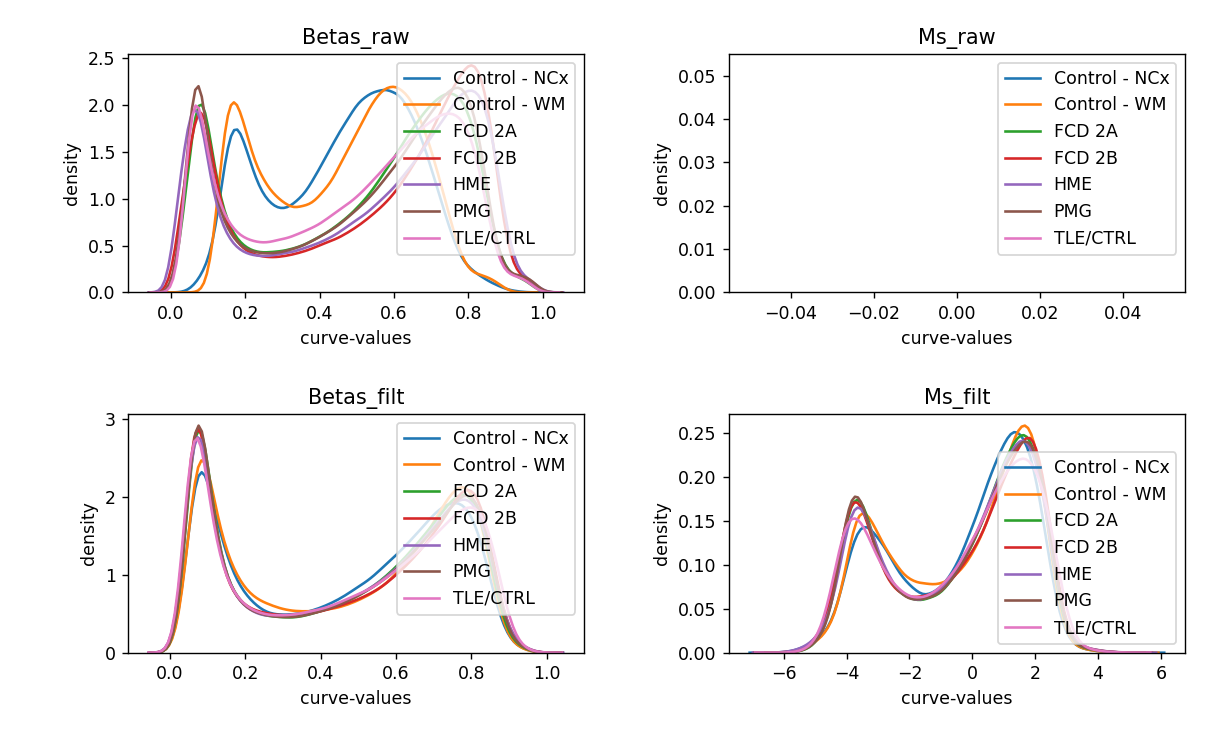

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/seaborn/distributio

In [57]:
## visualise what the data looks like before and after normalisation 
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw,'Betas_filt':preproidat.beta_py,'Ms_filt':preproidat.mval_py}, variant="grouped", group_by='disease', nrows=2)

In [185]:
%matplotlib notebook
preproidat.plt_mds(dataframe=mval_py, pheno=pheno_py,top=32000, n_components=2, group='disease', components=(0,1)) 

Loading BokehJS ...

In [186]:
''' Lets do a dimensionality reduction right away'''
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=beta_py
time_start = time.time()

mapper = umap.UMAP(n_neighbors=8,
                      min_dist=0.0,
                      n_components=2,
                      #metric='correlation',
                     random_state=123,
                     spread=3
                      ).fit(to_embed.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 2.7433009147644043 seconds


In [187]:
group='Methylation_Class'
pheno_py[group]#.unique()

0     CTRL NCx
1      CTRL WM
2     CTRL NCx
3     CTRL NCx
4      CTRL WM
        ...   
91         TLE
92         TLE
93         TLE
94         TLE
95         TLE
Name: Methylation_Class, Length: 96, dtype: object

In [188]:
%matplotlib notebook
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import seaborn as sns
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.palettes import d3
import bokeh.models as bmo



X_transformed=pd.DataFrame(embedding)
X_transformed[group]=pheno_py[group].to_numpy()     
X_transformed['ID']=pheno_py['ID'].to_numpy() 
X_transformed=X_transformed.rename(columns={0: "a", 1: "b"})


output_notebook()

p = figure(
    tools="hover,pan,wheel_zoom,save",
    toolbar_location="above",
    title='Test',
    plot_width=900, 
    plot_height=700,
)

palette = d3['Category20'][len(X_transformed[group].unique())]
color_map = bmo.CategoricalColorMapper(factors=X_transformed[group].unique(),
                                   palette=palette)

for key in pheno_py[group].unique():
    
    keys=ColumnDataSource(X_transformed[X_transformed[group]==key])

    p.scatter(x='a', y='b', size=10, source=keys ,legend_label=key, color={'field': group, 'transform': color_map})

#p.legend.orientation = "horizontal"
p.legend.location = "top_left"
p.legend.click_policy="hide"
p.hover.tooltips = [("ID", '@ID'), ("category", '@'+group)]
p.title.text = 'UMAP Plot'
show(p)

Loading BokehJS ...

<IPython.core.display.Javascript object>


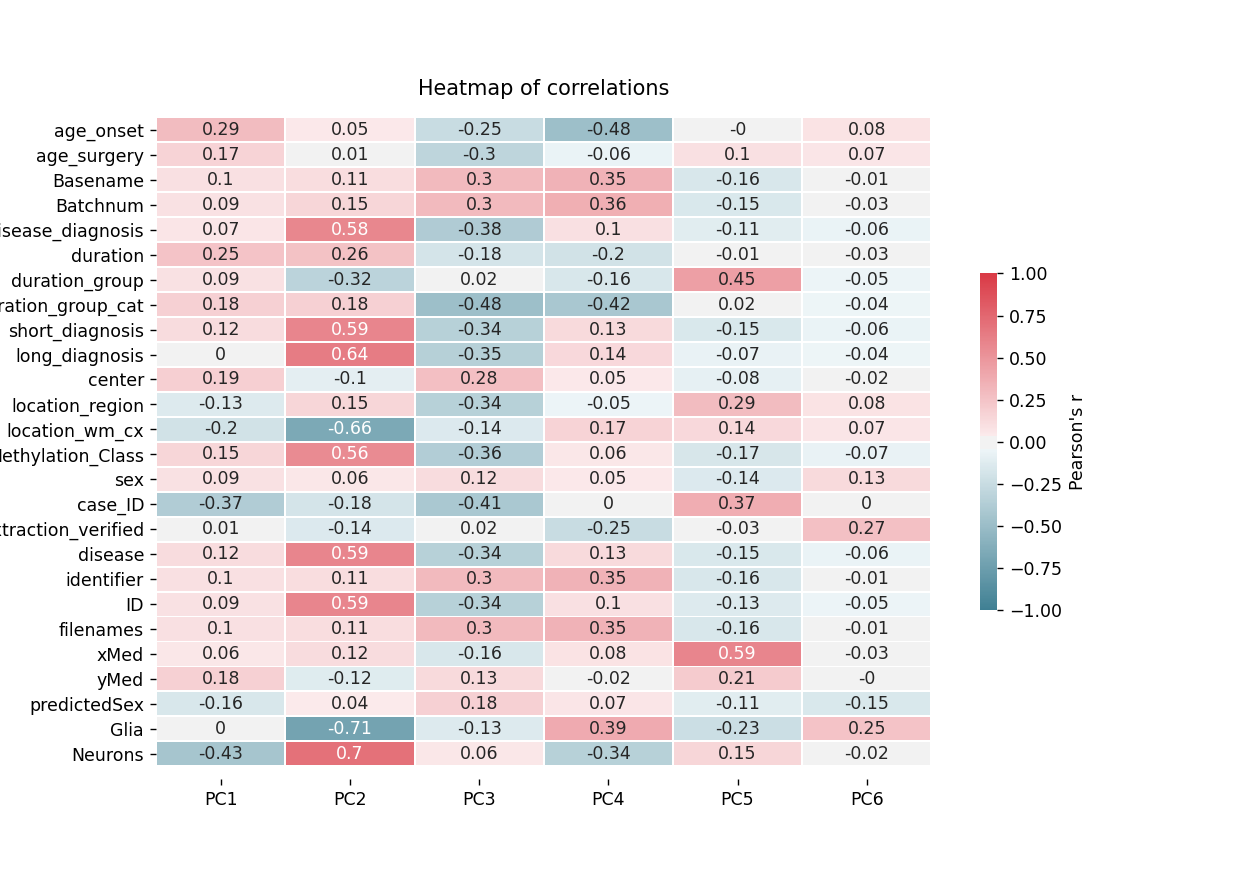

In [63]:
%matplotlib notebook
preproidat.plt_covariates(matrix=preproidat.mval, pheno=preproidat.pheno, pcs=6)

#### DMP Finder 

In [ ]:
'''Lets use the dmp_finder to get most significantly differentially methylated cpgs from each group comparison (contrast) available
it is possible to remove batch effects and find and include surrogate variable via the SVA method'''
preproidat.dmp_finder(matrix=preproidat.beta, 
                      pheno=preproidat.pheno, 
                      phenotype='disease_diagnosis',
                      #disease_list=None
                      #sample_list=None,
                      #adjust_vars=None
                      #correction_vars=None,
                      useCombat=False,
                      sva=True,
                      number=9, 
                      pvalue=0.01, 
                      adjpval=0.01,
                      save_csv=False,
                      path=None,
                      adjust_method='BY', 
                      method='separate',
                      include=True,                      
                      )

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Setting and returning original values
These are the possible pairwise groups for your comparisons 
 {1: 'Control - NCx-Control - WM', 2: 'Control - NCx-FCD 2A', 3: 'Control - NCx-FCD 2B', 4: 'Control - NCx-HME', 5: 'Control - NCx-PMG_1q', 6: 'Control - NCx-PMG', 7: 'Control - NCx-TLE/CTRL', 8: 'Control - WM-FCD 2A', 9: 'Control - WM-FCD 2B', 10: 'Control - WM-HME', 11: 'Control - WM-PMG_1q', 12: 'Control - WM-PMG', 13: 'Control - WM-TLE/CTRL', 14: 'FCD 2A-FCD 2B', 15: 'FCD 2A-HME', 16: 'FCD 2A-PMG_1q', 17: 'FCD 2A-PMG', 18: 'FCD 2A-TLE/CTRL', 19: 'FCD 2B-HME', 20: 'FCD 2B-PMG_1q', 21: 'FCD 2B-PMG', 22: 'FCD 2B-TLE/CTRL', 23: 'HME-PMG_1q', 24: 'HME-PMG', 25: 'HME-TLE/CTRL', 26: 'PMG_1q-PMG', 27: 'PMG_1q-TLE/CTRL', 28: 'PMG-TLE/CTRL'}
Enter your comparison of choice;- to get all comparisons type "all":
all
you selected all
Taking all cpgs into account for analysis
You have chosen to include surrogate variable analysis


<IPython.core.display.Javascript object>


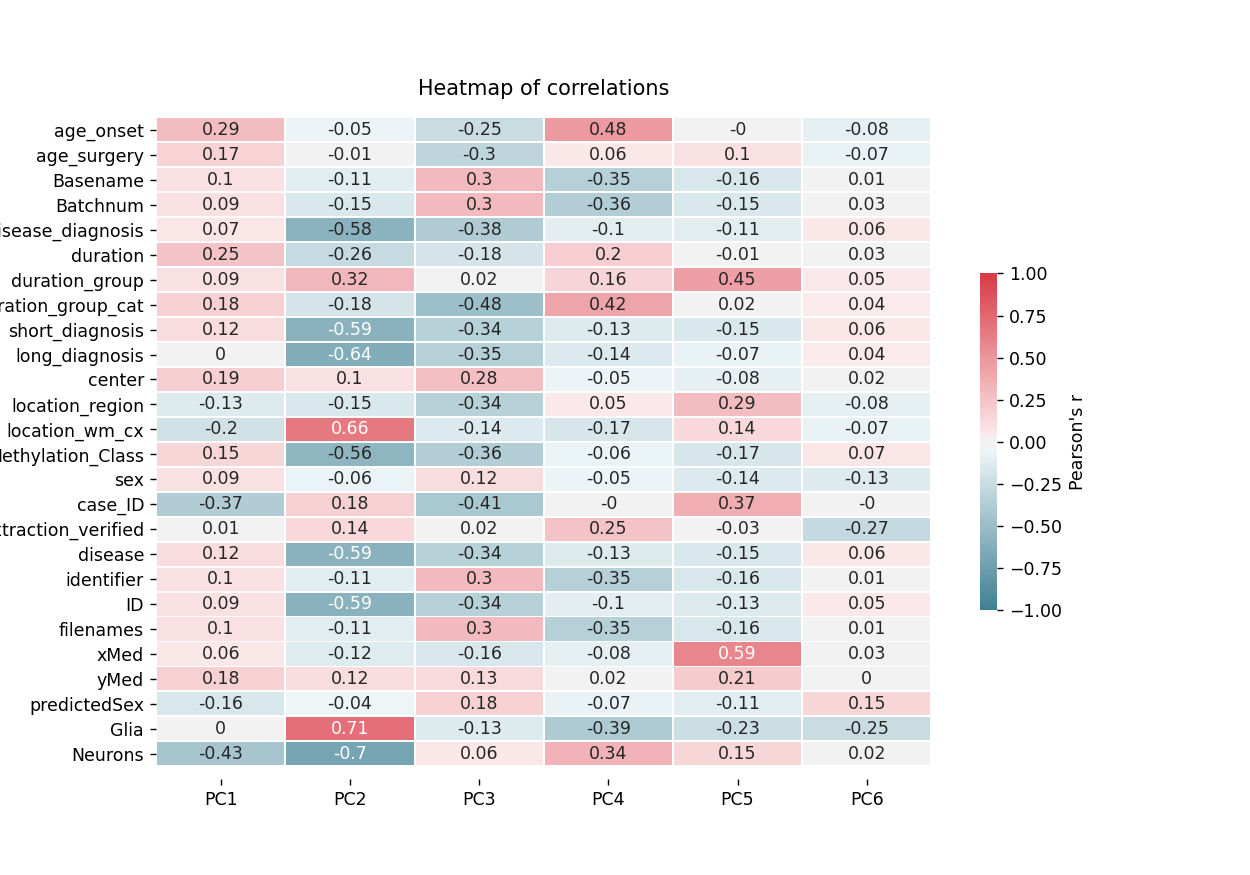

In [74]:
%matplotlib notebook
preproidat.plt_covariates(matrix=preproidat.sub_mval, pheno=preproidat.sub_pheno, pcs=6, ids='ID')

In [75]:
preproidat.dmps_df

,index,chr,pos,strand,Name,AddressA,AddressB,ProbeSeqA,ProbeSeqB,Type,...,TFBS_Evidence_Count,Methyl27_Loci,Methyl450_Loci,Random_Loci,logFC,AveExpr,t,P.Value,adj.P.Val,B
3,3,chr19,35787037,+,cg12402033,11735175,,AACTATTTTAAAACCCTACTTTATTCATATCTATCATCTACATAAT...,,II,...,,,,,0.473452,0.467860,10.717630,7.876404e-18,9.513410e-12,29.776899
8,8,chr17,79374741,+,cg01681525,81723492,,ATATTTAAAACAAACTATAAACAAAAACCACCCATATACCAAAATA...,,II,...,,,TRUE,,-0.351106,0.307440,-10.208253,9.076537e-17,6.053026e-11,27.449889
16,7,chr3,57541949,-,cg09589688,46694271,,TAAAAATTAATCTTCAAAATATTACAAACATACRTACCCACRCRCT...,,II,...,,,TRUE,,0.104119,0.079166,8.343732,7.263313e-13,5.449287e-07,18.744805
19,1,chr1,205283250,+,cg12303813,79696977,,CCRAACCAAAACATTATAAACAACTCCTCTTACRAAATTAAAACTA...,,II,...,,,TRUE,,0.373321,0.442456,9.914330,3.738119e-16,5.938575e-10,26.105808
21,3,chr4,86763803,+,cg21827912,79807433,,CATCACAAACTTTCTACAAACAATATTAACTAATTTTTACCACAAC...,,II,...,,,,,0.309506,0.192091,9.902487,3.957740e-16,5.938575e-10,26.051336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,3,chr4,71677272,-,cg16997777,74652186,,TATATCTCTATTCACTAAAAAAACCTAACAACAAACATACCAACAA...,,II,...,,,,,0.156025,0.429100,8.739332,1.083752e-13,1.626166e-07,20.712810
232,4,chr1,89831072,-,cg10438034,87644933,,TTACTCCCCTCAATAAAAAATCAAACAAAAACAAATTATACAACAA...,,II,...,,,TRUE,,0.167340,0.569828,8.602267,2.096778e-13,2.070141e-07,20.079512
233,5,chr15,52580669,+,cg15764949,58768580,,AACTAAATTTCAACTACAAAACACTCAATACCAACAAAAACACCAA...,,II,...,,,,,0.177693,0.473761,8.578807,2.347340e-13,2.070141e-07,19.971184
234,6,chr15,83563792,-,cg08942894,78789480,,AACCTCATATAAAAACTACTAAATAACACCAACAACATCAACCATC...,,II,...,,,TRUE,,0.146608,0.363337,8.566114,2.495148e-13,2.070141e-07,19.912580


In [77]:
preproidat.dectest

,disease_diagnosisControl...NCx-disease_diagnosisControl...WM,disease_diagnosisControl...NCx-disease_diagnosisFCD.2A,disease_diagnosisControl...NCx-disease_diagnosisFCD.2B,disease_diagnosisControl...NCx-disease_diagnosisHME,disease_diagnosisControl...NCx-disease_diagnosisPMG_1q,disease_diagnosisControl...NCx-disease_diagnosisPMG,disease_diagnosisControl...NCx-disease_diagnosisTLE.CTRL,disease_diagnosisControl...WM-disease_diagnosisFCD.2A,disease_diagnosisControl...WM-disease_diagnosisFCD.2B,disease_diagnosisControl...WM-disease_diagnosisHME,...,disease_diagnosisFCD.2B-disease_diagnosisHME,disease_diagnosisFCD.2B-disease_diagnosisPMG_1q,disease_diagnosisFCD.2B-disease_diagnosisPMG,disease_diagnosisFCD.2B-disease_diagnosisTLE.CTRL,disease_diagnosisHME-disease_diagnosisPMG_1q,disease_diagnosisHME-disease_diagnosisPMG,disease_diagnosisHME-disease_diagnosisTLE.CTRL,disease_diagnosisPMG_1q-disease_diagnosisPMG,disease_diagnosisPMG_1q-disease_diagnosisTLE.CTRL,disease_diagnosisPMG-disease_diagnosisTLE.CTRL
Down,3709.0,2786.0,15965.0,327.0,92.0,2639.0,1737.0,7984.0,4757.0,8478.0,...,579.0,4879.0,8082.0,9571.0,19.0,0.0,299.0,49.0,353.0,293.0
NotSig,426441.0,434856.0,402108.0,441101.0,441859.0,434289.0,436664.0,426289.0,428847.0,429193.0,...,441441.0,434915.0,428010.0,421800.0,442063.0,442087.0,441494.0,441978.0,441395.0,440906.0
Up,11937.0,4445.0,24014.0,659.0,136.0,5159.0,3686.0,7814.0,8483.0,4416.0,...,67.0,2293.0,5995.0,10716.0,5.0,0.0,294.0,60.0,339.0,888.0


In [78]:
preproidat.sub_pheno_py#['disease'].unique()

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,...,DNA_region_extraction_verified,disease,identifier,ID,filenames,xMed,yMed,predictedSex,Glia,Neurons
0,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,10.951649,9.266787,M,0.666973,0.639056
1,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - WM,0.0,0,0,Control - WM,Control - WM,...,ja,Control - WM,202818860053_R05C01,Control - WM.202818860053_R05C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,9.826548,9.030667,M,0.845086,0.302774
2,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,9.924070,10.583083,M,0.693268,0.618688
3,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202818860053_R08C01,Control - NCx.202818860053_R08C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,9.791163,10.468624,M,0.648756,0.666164
4,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202931510124,Control - WM,0.0,0,0,Control - WM,Control - WM,...,ja,Control - WM,202931510124_R01C01,Control - WM.202931510124_R01C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,9.978710,10.549785,M,0.887479,0.271375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,...,ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,12.641374,10.662668,M,0.684704,0.571935
92,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,...,ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,12.578726,13.149271,M,0.632480,0.591455
93,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,...,ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,12.710268,13.207319,M,0.681251,0.539425
94,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,...,ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,13.434368,11.002112,F,0.676933,0.543165


In [79]:
mval_10000=preproidat.sub_mval_py.loc[preproidat.dmps]; mval_10000

,Control - NCx.202818860053_R04C01,Control - WM.202818860053_R05C01,Control - NCx.202818860053_R06C01,Control - NCx.202818860053_R08C01,Control - WM.202931510124_R01C01,Control - NCx.202931510124_R04C01,Control - WM.202931510124_R05C01,Control - NCx.202931510124_R06C01,Control - WM.202931510124_R07C01,Control - NCx.202931510124_R08C01,...,TLE/CTRL.202148010058_R03C01,TLE/CTRL.202148010058_R04C01,TLE/CTRL.202148010058_R05C01,TLE/CTRL.202148010058_R06C01,TLE/CTRL.202148010058_R07C01,TLE/CTRL.202148010058_R08C01,TLE/CTRL.202148010059_R01C01,TLE/CTRL.202148010059_R02C01,TLE/CTRL.202148010059_R03C01,TLE/CTRL.202148010059_R04C01
cg12402033,2.518938,-2.283064,1.210934,0.525093,-2.208201,0.226555,-2.417807,0.757836,-2.179868,1.481132,...,-0.133654,0.350587,-0.132120,-0.176689,0.394758,-0.017873,0.774670,0.268712,0.334083,0.694342
cg01681525,-2.461513,0.311655,-2.515415,-2.071153,-0.411626,-2.349568,-0.721389,-2.033012,-0.723493,-2.726107,...,-1.817070,-1.519969,-0.839526,-0.990656,-1.130341,-1.513171,-1.426866,-1.316984,-1.625701,-1.455987
cg09589688,-2.655698,-3.151013,-1.428792,-2.888977,-3.237757,-1.989067,-3.659701,-2.262768,-3.243921,-2.753409,...,-3.169384,-3.804145,-4.245772,-3.876312,-3.601194,-4.327471,-3.758030,-3.806922,-3.909706,-3.630161
cg12303813,1.253205,-1.482141,1.196313,1.226640,-1.187982,1.134249,-1.068861,0.184232,-0.867034,0.838885,...,0.052432,-0.223639,-0.329301,0.319074,-0.222664,0.282545,0.374536,0.042797,-0.366211,0.010222
cg21827912,-0.529497,-0.720134,0.203281,0.425148,-1.623235,-0.954287,-2.935314,-0.992435,-2.057745,-0.904767,...,-1.818696,-2.192109,-2.248081,-1.613953,-1.988914,-0.754062,-1.130088,-1.569414,-1.295535,-2.334846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg16997777,-0.243290,0.242880,-0.290443,-0.290695,0.144186,-0.189119,0.408522,0.008186,0.193077,-0.234643,...,-0.827123,-1.203198,-1.195262,-1.243822,-1.084358,-1.066234,-1.532841,-1.119455,-0.960028,-1.116858
cg10438034,0.078646,-0.240543,-0.174049,0.202724,0.420441,0.409596,0.568553,0.669768,0.363787,0.346948,...,0.140342,0.235428,0.069022,0.092550,-0.249836,-0.437106,0.059232,-0.095183,0.075238,-0.022336
cg15764949,0.229047,0.241670,0.039549,0.345537,0.493408,-0.188567,-0.082603,-0.152465,0.025539,0.075832,...,-0.659974,-1.030762,-0.861778,-1.016802,-0.824901,-0.672153,-0.961608,-1.147937,-0.806412,-0.605798
cg08942894,-0.426985,-0.608582,-0.766206,-0.144217,-0.757647,-0.564249,-1.407550,-0.556143,-1.300510,0.092315,...,-1.585602,-0.943043,-1.354225,-1.325302,-1.135864,-1.179072,-1.458578,-1.077971,-1.241741,-1.267100


In [80]:

beta_10000=preproidat.sub_beta_py.loc[preproidat.dmps];beta_10000

,Control - NCx.202818860053_R04C01,Control - WM.202818860053_R05C01,Control - NCx.202818860053_R06C01,Control - NCx.202818860053_R08C01,Control - WM.202931510124_R01C01,Control - NCx.202931510124_R04C01,Control - WM.202931510124_R05C01,Control - NCx.202931510124_R06C01,Control - WM.202931510124_R07C01,Control - NCx.202931510124_R08C01,...,TLE/CTRL.202148010058_R03C01,TLE/CTRL.202148010058_R04C01,TLE/CTRL.202148010058_R05C01,TLE/CTRL.202148010058_R06C01,TLE/CTRL.202148010058_R07C01,TLE/CTRL.202148010058_R08C01,TLE/CTRL.202148010059_R01C01,TLE/CTRL.202148010059_R02C01,TLE/CTRL.202148010059_R03C01,TLE/CTRL.202148010059_R04C01
cg12402033,0.851447,0.170442,0.698330,0.590000,0.177905,0.539179,0.157640,0.628384,0.180795,0.736264,...,0.476856,0.560455,0.477121,0.469420,0.567983,0.496903,0.631105,0.546430,0.557635,0.618050
cg01681525,0.153658,0.553797,0.148862,0.192225,0.429151,0.164023,0.377534,0.196364,0.377191,0.131291,...,0.221061,0.258542,0.358492,0.334774,0.313568,0.259446,0.271104,0.286414,0.244743,0.267134
cg09589688,0.136958,0.101186,0.270840,0.118942,0.095847,0.201215,0.073324,0.172440,0.095478,0.129147,...,0.100034,0.066805,0.050071,0.063754,0.076128,0.047445,0.068826,0.066685,0.062386,0.074728
cg12303813,0.704466,0.263600,0.696190,0.700618,0.305033,0.687015,0.322812,0.531882,0.354119,0.641406,...,0.509085,0.461324,0.443183,0.555067,0.461492,0.548805,0.564540,0.507416,0.436879,0.501771
cg21827912,0.409261,0.377738,0.535168,0.573144,0.245059,0.340411,0.115617,0.334500,0.193673,0.348160,...,0.220866,0.179542,0.173898,0.246251,0.201232,0.372227,0.313605,0.252026,0.289462,0.165427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg16997777,0.457941,0.541989,0.449839,0.449796,0.524965,0.467275,0.570322,0.501418,0.533408,0.459429,...,0.360472,0.302801,0.303964,0.296890,0.320469,0.323210,0.256835,0.315194,0.339518,0.315583
cg10438034,0.513625,0.458413,0.469876,0.535072,0.572346,0.570505,0.597267,0.614021,0.562708,0.559833,...,0.524300,0.540706,0.511958,0.516032,0.456815,0.424829,0.510263,0.483512,0.513035,0.496130
cg15764949,0.539608,0.541781,0.506853,0.559592,0.584677,0.467370,0.485690,0.473604,0.504425,0.513138,...,0.387589,0.328612,0.354953,0.330750,0.360827,0.385587,0.339273,0.310948,0.363788,0.396539
cg08942894,0.426545,0.396077,0.370262,0.475030,0.371646,0.403451,0.273758,0.404804,0.288754,0.515991,...,0.249917,0.342164,0.281168,0.285237,0.312744,0.306343,0.266782,0.321433,0.297191,0.293533


#### UMAP Visualization

In [104]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=beta_10000
time_start = time.time()

mapper = umap.UMAP(n_neighbors=7,#25
                      min_dist=0.0,
                      n_components=2,
                   n_epochs=2000,
                   #init='random',
                      metric='euclidean',
                  #angular_rp_forest=True,
                   #metric_kwds={'p':0.9},
                   #transform_queue_size=14.1,
                     #output_metric='haversine',
                  # target_weight=0.7,
                     random_state=123,
                     spread=3,
                  #local_connectivity=1.0,
                  #negative_sample_rate=6,
                  # a=1,
                   #b=1.5,
                   #repulsion_strength=1.6,
                   verbose=True,
                   #unique=True
                   
                      ).fit(to_embed.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.0, n_components=2, n_epochs=2000,
     n_neighbors=7, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=123, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=3, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Wed Sep  2 11:04:35 2020 Finding Nearest Neighbors
Wed Sep  2 11:04:35 2020 Finished Nearest Neighbor Search
Wed Sep  2 11:04:35 2020 Construct embedding
	completed  0  /  2000 epochs
	completed  200  /  2000 epochs
	completed  400  /  2000 epochs
	completed  600  /  2000 epochs
	completed  800  /  2000 epochs
	completed  1000  /  2000 epochs
	compl

In [106]:
%matplotlib notebook
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import seaborn as sns

from seaborn import cubehelix_palette
group='disease'
case_ID='case_ID'
diagnosis='disease_diagnosis'
X_transformed=pd.DataFrame(embedding)
X_transformed[group]=preproidat.sub_pheno_py[group].to_numpy()     
X_transformed[group]=X_transformed[group].astype('str')

X_transformed['ID']=preproidat.sub_pheno_py['ID'].to_numpy() 
X_transformed[case_ID]=preproidat.sub_pheno_py[case_ID].to_numpy()
X_transformed[diagnosis]=preproidat.sub_pheno_py[diagnosis].to_numpy()
X_transformed['location_region']=preproidat.sub_pheno_py['location_region'].to_numpy()
X_transformed['location_wm_cx']=preproidat.sub_pheno_py['location_wm_cx'].to_numpy()
X_transformed['duration_group_cat']=preproidat.sub_pheno_py['duration_group'].to_numpy()
#X_transformed['color'] = X_transformed.apply(lambda row: label_cat(row), axis=1)
#X_transformed['color'] = [colordict[x] for x in X_transformed[group]]
X_transformed=X_transformed.rename(columns={0: "a", 1: "b"})
# create a color iterator
import itertools

from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.transform import linear_cmap


from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
output_notebook()

p = figure(
    tools="hover,pan,wheel_zoom,save",
    toolbar_location="above",
    title='Test',
    plot_width=900, 
    plot_height=700,
)

if len(X_transformed[group].unique())!=2:
            palette = d3['Category20'][len(X_transformed[group].unique())]
            #palette = Turbo256#d3['Category20'][20]+d3['Category20b'][20]+d3['Category20c'][20]
            color_map = bmo.CategoricalColorMapper(factors=X_transformed[group].unique(),
                                              palette=palette)
            #colors = itertools.cycle(palette) 
            
elif len(X_transformed[group].unique())==2:
            colors=['red', 'green']
            #from bokeh.palettes import brewer
            #colors = brewer["Spectral"][len(X_transformed[group].unique())]

            # Create a map between factor and color.
            colormap = {k: colors[i] for i,k in enumerate(X_transformed[group].unique())}

            # Create a list of colors for each value that we will be looking at.
            X_transformed['colors'] = [colormap[x] for x in X_transformed[group]]


#palette = d3['Category20'][len(X_transformed[group].unique())]
#color_map = bmo.CategoricalColorMapper(factors=X_transformed[group].unique(),
                                   #palette=palette)

for key in X_transformed[group].unique():

    
    keys=ColumnDataSource(X_transformed[X_transformed[group]==key])

    if len(X_transformed[group].unique())!=2:
        p.scatter(x='a', y='b', size=10, source=keys ,legend_label=key, color={'field': group, 'transform': color_map})
    else:
        p.scatter(x='a', y='b', size=10, source=keys ,legend_label=key, color='colors')

p.legend.location = "top_left"
p.legend.click_policy="hide"
p.hover.tooltips = [("ID", '@ID'), ("category", '@'+group), ("Name", '@'+case_ID), ("diagnosis", '@'+diagnosis), 
                    ('Region', '@location_region'), ('Location', '@location_wm_cx'),('Duration_Group', '@duration_group_cat')]
p.title.text = 'UMAP Plot'
show(p)


Loading BokehJS ...

In [107]:
%matplotlib notebook
from bokeh.palettes import Greys256
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import seaborn as sns
from bokeh.transform import linear_cmap
from seaborn import cubehelix_palette
group='duration'
case_ID='case_ID'
diagnosis='disease_diagnosis'
X_transformed=pd.DataFrame(embedding)
X_transformed[group]=preproidat.sub_pheno_py[group].to_numpy()     
X_transformed[group]=X_transformed[group]#.astype('str')

X_transformed['ID']=preproidat.sub_pheno_py['ID'].to_numpy() 
X_transformed[case_ID]=preproidat.sub_pheno_py[case_ID].to_numpy()
X_transformed[diagnosis]=preproidat.sub_pheno_py[diagnosis].to_numpy()
X_transformed['location_region']=preproidat.sub_pheno_py['location_region'].to_numpy()
X_transformed['location_wm_cx']=preproidat.sub_pheno_py['location_wm_cx'].to_numpy()
X_transformed['duration_group_cat']=preproidat.sub_pheno_py['duration_group'].to_numpy()
#X_transformed['color'] = X_transformed.apply(lambda row: label_cat(row), axis=1)
#X_transformed['color'] = [colordict[x] for x in X_transformed[group]]
X_transformed=X_transformed.rename(columns={0: "a", 1: "b"})
# create a color iterator
#X_transformed[group]=X_transformed[group].astype('float32')
import itertools
   
#colordict={}
#for items, values in zip(X_transformed[group].unique().tolist(), colors):
#    colordict[items]=values

from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.transform import linear_cmap
#colors = [colordict[x] for x in X_transformed[group]]

from bokeh.models import ColumnDataSource, ColorBar
from bokeh.plotting import figure, show
output_notebook()

p = figure(
    tools="hover,pan,wheel_zoom,save",
    toolbar_location="above",
    title='Test',
    plot_width=900, 
    plot_height=700,
)

if len(X_transformed[group].unique())!=2:
            #palette = d3['Category20'][len(X_transformed[group].unique())]
            palette = list(Greys256)
            
            palette.reverse()
            palette=palette[20:]
            palette=tuple(palette)
            
            #256#d3['Category20'][20]+d3['Category20b'][20]+d3['Category20c'][20]
            #color_map = bmo.CategoricalColorMapper(factors=X_transformed[group].unique(),
            #                                  palette=palette)
            color_map = bmo.LinearColorMapper(palette=palette, low=min(X_transformed[group]), high=max(X_transformed[group]))
            mapper = linear_cmap(field_name=group, palette=palette, low=min(X_transformed[group]), high=max(X_transformed[group]))
            color_bar = ColorBar(color_mapper=mapper['transform'], width=8,  location=(0,0))
            #colors = itertools.cycle(palette) 
            
elif len(X_transformed[group].unique())==2:
            colors=['red', 'green']
            #from bokeh.palettes import brewer
            #colors = brewer["Spectral"][len(X_transformed[group].unique())]

            # Create a map between factor and color.
            colormap = {k: colors[i] for i,k in enumerate(X_transformed[group].unique())}

            # Create a list of colors for each value that we will be looking at.
            X_transformed['colors'] = [colormap[x] for x in X_transformed[group]]


#palette = d3['Category20'][len(X_transformed[group].unique())]
#color_map = bmo.CategoricalColorMapper(factors=X_transformed[group].unique(),
                                   #palette=palette)

for key in X_transformed[group].unique():

    
    keys=ColumnDataSource(X_transformed[X_transformed[group]==key])

    if len(X_transformed[group].unique())!=2:
        p.scatter(x='a', y='b', size=10, source=keys ,  color={'field': group, 'transform': color_map})
    else:
        p.scatter(x='a', y='b', size=10, source=keys , color='colors')

p.legend.location = "top_left"
p.legend.click_policy="hide"
p.add_layout(color_bar, 'right')
p.hover.tooltips = [("ID", '@ID'), ("category", '@'+group), ("Name", '@'+case_ID), ("diagnosis", '@'+diagnosis), 
                    ('Region', '@location_region'), ('Location', '@location_wm_cx'),('Duration_Group', '@duration_group_cat')]
p.title.text = 'UMAP Plot'
show(p)


Loading BokehJS ...

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/bokeh/models/plots.py:764: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/bokeh/models/plots.py:764: UserWarning: 
You are attempting to set `plot.legend.click_policy` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


#### Hierachical Cluster Analysis 

In [ ]:
group='disease'
palette = d3['Category20'][len(preproidat.sub_pheno_py[group].unique())]
betac=beta_10000.transpose()
#betac= X_transformed[['Methylation_Class','a','b']].set_index('Methylation_Class')#mval_10000.transpose()#betaraw.transpose()#

betac

In [144]:
betac[group]=preproidat.sub_pheno_py[group].to_numpy(); betac
betac=betac.set_index(group).sort_index(); betac#index.tolist()#;betac

,cg12402033,cg01681525,cg09589688,cg12303813,cg21827912,cg26597727,cg05494565,cg20233727,cg11099706,cg00500522,...,cg13784045,cg22513396,cg13395333,cg23973972,cg23819092,cg16997777,cg10438034,cg15764949,cg08942894,cg25728699
disease,,,,,,,,,,,,,,,,,,,,,
Control - NCx,0.851447,0.153658,0.136958,0.704466,0.409261,0.467735,0.652158,0.381438,0.531815,0.231541,...,0.840259,0.589848,0.192138,0.380234,0.317506,0.457941,0.513625,0.539608,0.426545,0.729761
Control - NCx,0.698330,0.148862,0.270840,0.696190,0.535168,0.474126,0.567079,0.547693,0.616437,0.315628,...,0.819587,0.569484,0.175587,0.370112,0.308727,0.449839,0.469876,0.506853,0.370262,0.774411
Control - NCx,0.590000,0.192225,0.118942,0.700618,0.573144,0.548444,0.626266,0.315320,0.554241,0.242075,...,0.824208,0.603744,0.179354,0.394031,0.286105,0.449796,0.535072,0.559592,0.475030,0.783307
Control - NCx,0.539179,0.164023,0.201215,0.687015,0.340411,0.444874,0.584984,0.581331,0.665730,0.267024,...,0.755241,0.681931,0.123968,0.361094,0.331270,0.467275,0.570505,0.467370,0.403451,0.894200
Control - NCx,0.736264,0.131291,0.129147,0.641406,0.348160,0.514774,0.491585,0.562030,0.605212,0.288613,...,0.742149,0.647039,0.129356,0.441441,0.285350,0.459429,0.559833,0.513138,0.515991,0.766936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TLE/CTRL,0.479887,0.209406,0.058540,0.602464,0.134589,0.254443,0.436735,0.697502,0.755453,0.199750,...,0.826356,0.674841,0.117333,0.243856,0.297030,0.335538,0.507482,0.362809,0.314061,0.557810
TLE/CTRL,0.452652,0.289069,0.067814,0.496496,0.168911,0.293807,0.363366,0.774755,0.739340,0.251239,...,0.810761,0.699424,0.115862,0.242346,0.234539,0.354163,0.421800,0.346986,0.313944,0.578447
TLE/CTRL,0.557635,0.244743,0.062386,0.436879,0.289462,0.311569,0.408161,0.694955,0.721277,0.191520,...,0.825626,0.657914,0.121786,0.252609,0.341467,0.339518,0.513035,0.363788,0.297191,0.740625


In [145]:
lut = dict(zip(preproidat.sub_pheno_py[group].unique(), palette))#kw
row_colors = betac.index.map(lut)
#g = sns.clustermap(iris, column_colors=row_colors)
#row_color=pd.DataFrame(row_colors).set_index(betac.index)
row_colors

Index(['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4',
       '#aec7e8', '#aec7e8', '#aec7e8', '#aec7e8', '#aec7e8', '#aec7e8',
       '#aec7e8', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e',
       '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e',
       '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e',
       '#ffbb78', '#ffbb78', '#ffbb78', '#ffbb78', '#ffbb78', '#ffbb78',
       '#ffbb78', '#ffbb78', '#ffbb78', '#ffbb78', '#ffbb78', '#ffbb78',
       '#ffbb78', '#ffbb78', '#ffbb78', '#ffbb78', '#ffbb78', '#ffbb78',
       '#ffbb78', '#2ca02c', '#2ca02c', '#2ca02c', '#2ca02c', '#2ca02c',
       '#2ca02c', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a',
       '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a',
       '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a',
       '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a', '#98df8a',
       '#98df8a', '#98df8a', '#98df8a', '#d62728', 

In [146]:
import scipy.cluster.hierarchy as shc 
link=shc.linkage(embedding,method='ward',metric="euclidean", optimal_ordering=True)


<IPython.core.display.Javascript object>


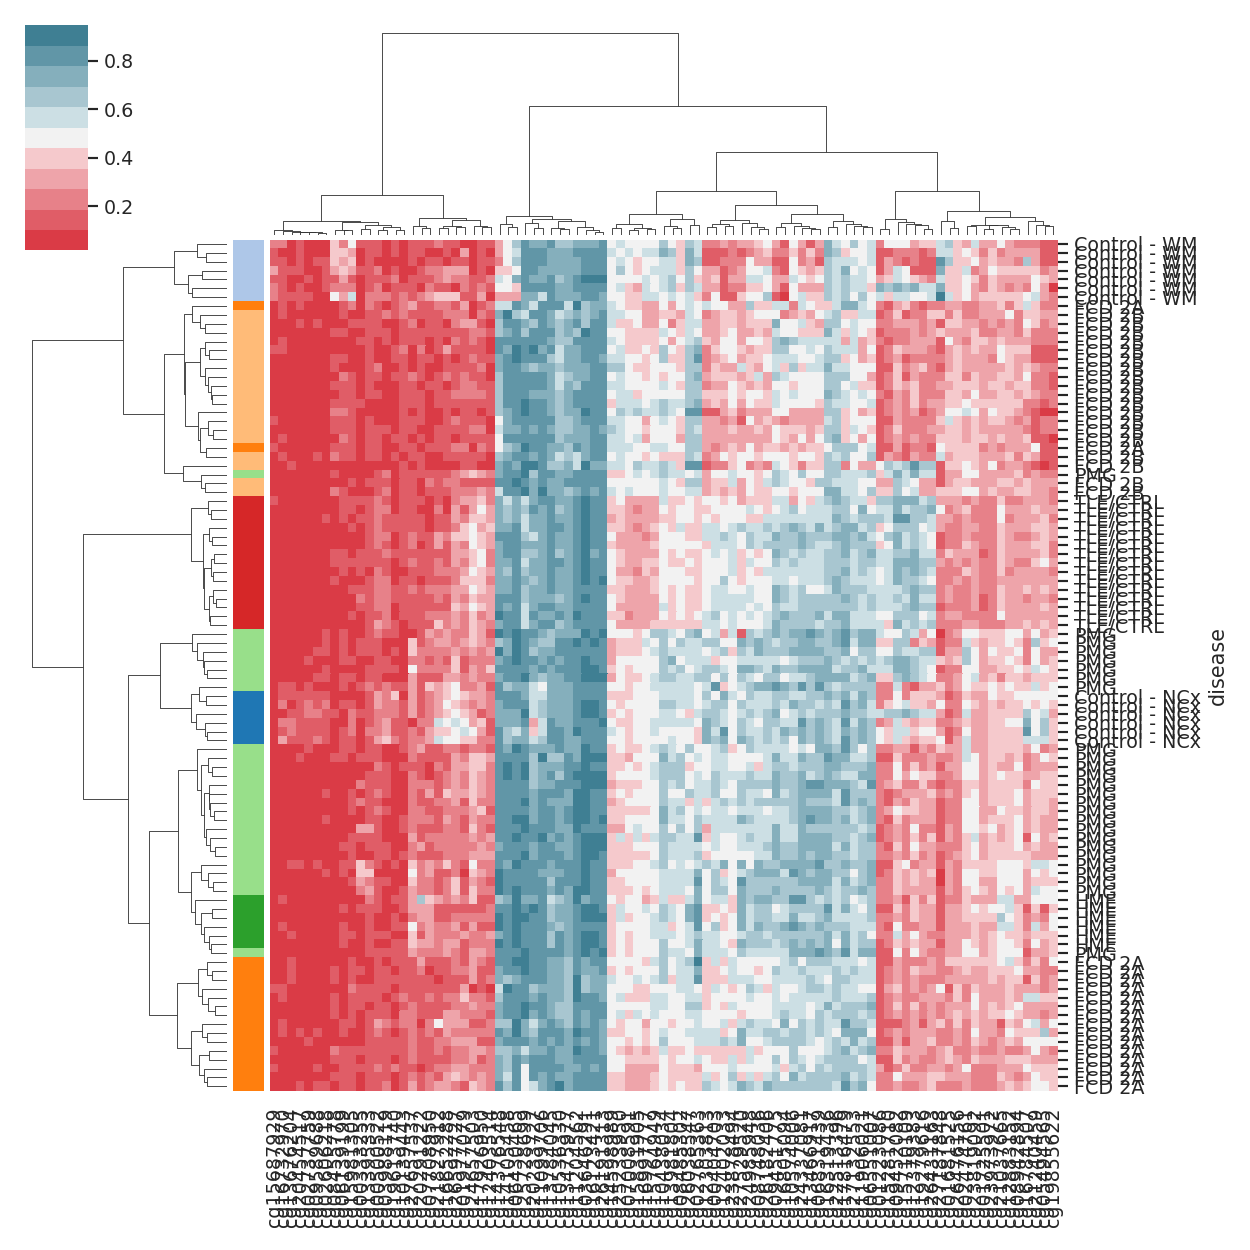

In [150]:
%matplotlib notebook
import scipy.cluster.hierarchy as shc 
import seaborn as sns 
import scipy.spatial.distance as ssd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
sns.set(color_codes=True)
#iris = sns.load_dataset("iris")
#species = iris.pop("species")
#z_score=1, 
clm=sns.clustermap(betac,
               #z_score=1,
               #standard_scale=1,
               method='ward',
               col_cluster=True,
               # don't turn off row_clustering, because it will do some default clustering/ordering
               row_cluster=True,
               metric='euclidean',
               cmap=sns.diverging_palette(10, 220, sep=2, n=11),
               xticklabels=True,
               yticklabels=True,
               row_colors=row_colors,
               #row_linkage=link,
               #row_linkage=linkage, 
               #col_linkage=shc.linkage(betac.transpose(), metric='euclidean', optimal_ordering=True),
               #figsize=(19.991,14)
              )

# Processing of spreadsheets 

In [311]:
#mval_10000.to_csv('mvals.csv')

In [312]:
#beta_10000.to_csv('betas.csv')

In [313]:
#preproidat.sub_pheno_py.to_csv('pheno.csv')

In [1128]:
### creating saves for publication####

detP_intersect, unmeth, meth=robjects.r("""function (RGSet, M){

detP <- detectionP(RGSet)
MSet <- preprocessRaw(RGSet) 
#print(make.names(colnames(MSet)))
MSet_intersect<-MSet[rownames(MSet) %in% rownames(M), make.names(colnames(MSet)) %in% colnames(M)]
detP_intersect<-detP[rownames(detP) %in% rownames(M), make.names(colnames(detP)) %in% colnames(M)]
unmeth_intersect<- getUnmeth(MSet_intersect)
meth_intersect<- getMeth(MSet_intersect)
#colnames(M[1:3,])
return(list(detP_intersect,unmeth_intersect,meth_intersect))
}""")(preproidat.RGset_orig, pandas2ri.py2ri(mval_10000))


In [1129]:
meth

2550,3984,4414,166,...,5589,2960,337,7387


In [1130]:
robjects.r('write.csv')(detP_intersect, 'detP_pmg.csv')
robjects.r('write.csv')(unmeth, 'unmeth_pmg.csv')
robjects.r('write.csv')(meth, 'meth_pmg.csv')

rpy2.rinterface.NULL

In [1131]:
detps=pd.read_csv('detP_pmg.csv', index_col=0);detps

,Control - NCx.202818860053_R04C01,Control - NCx.202818860053_R06C01,Control - NCx.202818860053_R08C01,Control - NCx.202931510124_R04C01,Control - NCx.202931510124_R06C01,Control - NCx.202931510124_R08C01,Control - WM.202818860053_R05C01,Control - WM.202931510124_R01C01,Control - WM.202931510124_R05C01,Control - WM.202931510124_R07C01,...,TLE/CTRL.202148010053_R06C01,TLE/CTRL.202148010053_R07C01,TLE/CTRL.202148010058_R01C01,TLE/CTRL.202148010058_R04C01,TLE/CTRL.202148010058_R07C01,TLE/CTRL.202148010059_R01C01,TLE/CTRL.202148010059_R03C01,TLE/CTRL.202148010059_R04C01,TLE/CTRL.202148010058_R05C01,TLE/CTRL.202148010058_R08C01
cg09143801,2.207131e-137,1.076619e-268,7.296869e-283,5.547596e-207,0.000000e+00,0.000000e+00,9.511868e-68,5.405190e-109,2.408846e-102,0.000000e+00,...,4.198815e-117,4.007687e-91,6.366020e-142,6.082884e-281,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.472153e-143
cg22308726,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg02475600,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg22997177,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg16123421,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23561531,2.131903e-258,2.133905e-183,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.185988e-129,1.408696e-206,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg11599015,2.053624e-91,2.301630e-163,5.802634e-96,7.544350e-190,0.000000e+00,0.000000e+00,1.234580e-57,3.707538e-208,3.966354e-139,1.352437e-280,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.370934e-248
cg13395333,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg04947137,4.440623e-11,4.775156e-06,4.642424e-12,2.184505e-22,1.994680e-59,8.356650e-10,8.268321e-03,3.348821e-07,6.105074e-76,2.270166e-25,...,2.135553e-66,2.146994e-50,1.573183e-112,4.923517e-66,6.174251e-33,1.473516e-67,2.440733e-102,8.910904e-71,2.302788e-71,8.391662e-24


In [1132]:
unmeths=pd.read_csv('unmeth_pmg.csv',index_col=0);unmeths

,Control - NCx.202818860053_R04C01,Control - NCx.202818860053_R06C01,Control - NCx.202818860053_R08C01,Control - NCx.202931510124_R04C01,Control - NCx.202931510124_R06C01,Control - NCx.202931510124_R08C01,Control - WM.202818860053_R05C01,Control - WM.202931510124_R01C01,Control - WM.202931510124_R05C01,Control - WM.202931510124_R07C01,...,TLE/CTRL.202148010053_R06C01,TLE/CTRL.202148010053_R07C01,TLE/CTRL.202148010058_R01C01,TLE/CTRL.202148010058_R04C01,TLE/CTRL.202148010058_R07C01,TLE/CTRL.202148010059_R01C01,TLE/CTRL.202148010059_R03C01,TLE/CTRL.202148010059_R04C01,TLE/CTRL.202148010058_R05C01,TLE/CTRL.202148010058_R08C01
cg09143801,2805,1595,2159,3380,5533,4048,1282,1538,1802,3633,...,3868,2557,3770,7396,6207,10521,8520,8181,6322,4661
cg22308726,2375,3513,1677,4329,5642,3777,367,377,974,3369,...,1684,1772,1926,3438,2187,4043,5198,5455,3661,1706
cg02475600,793,468,302,821,1060,662,308,392,1017,1019,...,1365,1374,1523,1806,1911,2553,2358,4201,2576,1882
cg22997177,6559,2492,3406,5132,6929,5914,1812,1840,4141,6664,...,6742,7065,7080,10362,8576,10632,13127,11498,10004,8353
cg16123421,848,606,542,504,502,463,619,581,588,478,...,1148,1134,1052,994,1307,996,888,1409,1443,1266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23561531,1968,1217,1598,2644,3303,2904,1901,2396,4771,6166,...,10389,9512,11230,8436,7152,15237,13579,15971,10638,7440
cg11599015,1520,1329,1065,1614,2929,2620,1305,2328,1944,2895,...,4323,6289,6234,9794,5877,9547,11758,11776,6491,4521
cg13395333,11460,9558,8197,11369,13306,11394,8198,8949,9841,12760,...,14742,13890,17937,20197,16125,24980,27488,25311,17622,16658
cg04947137,969,511,798,1303,2019,1209,407,593,2040,1310,...,3616,3046,5119,4565,2777,5078,7224,6374,4391,3257


In [1133]:
meths=pd.read_csv('meth_pmg.csv',index_col=0); meths

,Control - NCx.202818860053_R04C01,Control - NCx.202818860053_R06C01,Control - NCx.202818860053_R08C01,Control - NCx.202931510124_R04C01,Control - NCx.202931510124_R06C01,Control - NCx.202931510124_R08C01,Control - WM.202818860053_R05C01,Control - WM.202931510124_R01C01,Control - WM.202931510124_R05C01,Control - WM.202931510124_R07C01,...,TLE/CTRL.202148010053_R06C01,TLE/CTRL.202148010053_R07C01,TLE/CTRL.202148010058_R01C01,TLE/CTRL.202148010058_R04C01,TLE/CTRL.202148010058_R07C01,TLE/CTRL.202148010059_R01C01,TLE/CTRL.202148010059_R03C01,TLE/CTRL.202148010059_R04C01,TLE/CTRL.202148010058_R05C01,TLE/CTRL.202148010058_R08C01
cg09143801,2550,3122,2819,2595,4599,4689,1243,1684,1937,5065,...,4135,3968,5921,7541,7072,11918,15031,14493,9186,7756
cg22308726,3984,4340,4015,4160,7016,5016,1693,2678,4200,5116,...,7894,5994,8210,10227,10101,12426,11545,12523,11004,9228
cg02475600,4414,5126,4048,5524,8663,6284,1518,3849,5363,7521,...,8120,6284,6589,9897,8408,10959,13387,10106,10505,10773
cg22997177,166,320,241,981,375,624,740,2229,3189,1394,...,2099,1642,1083,2059,1519,1517,1774,3077,1725,1440
cg16123421,5168,5622,3984,6875,8585,6028,3696,4316,6088,9198,...,10333,7880,9575,10385,7418,10204,10567,11632,8905,7457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23561531,2538,1399,2031,4057,4029,3432,376,484,1172,2395,...,7820,7191,7598,8661,8623,9445,11090,10277,8133,8033
cg11599015,1254,1153,947,2172,4338,3236,288,562,965,1472,...,3978,2595,3863,7510,6158,8856,8471,10362,6987,5589
cg13395333,2169,1775,1367,1654,2025,1513,1541,1462,1659,1622,...,2097,1914,1907,2860,2931,2932,2864,2737,2572,2960
cg04947137,112,113,57,146,164,99,60,117,176,229,...,522,333,310,440,387,367,497,340,523,337


In [1134]:
mval_10000#.transpose()

,Control - NCx.202818860053_R04C01,Control - NCx.202818860053_R06C01,Control - NCx.202818860053_R08C01,Control - NCx.202931510124_R04C01,Control - NCx.202931510124_R06C01,Control - NCx.202931510124_R08C01,Control - WM.202818860053_R05C01,Control - WM.202931510124_R01C01,Control - WM.202931510124_R05C01,Control - WM.202931510124_R07C01,...,TLE/CTRL.202148010053_R06C01,TLE/CTRL.202148010053_R07C01,TLE/CTRL.202148010058_R01C01,TLE/CTRL.202148010058_R04C01,TLE/CTRL.202148010058_R07C01,TLE/CTRL.202148010059_R01C01,TLE/CTRL.202148010059_R03C01,TLE/CTRL.202148010059_R04C01,TLE/CTRL.202148010058_R05C01,TLE/CTRL.202148010058_R08C01
cg26598162,1.374303,0.180667,0.930629,-0.099189,0.048901,0.964125,-2.763860,-2.565872,-2.025732,-1.934633,...,-0.533896,-0.324934,-0.594181,-0.196400,-0.532272,0.075717,0.019932,-0.436880,-0.065458,-0.902012
cg12402033,2.506152,1.202770,0.512664,0.213288,0.735307,1.458339,-2.290480,-2.222458,-2.436876,-2.195650,...,-0.298654,-0.244938,-0.582120,0.322183,0.364116,0.745321,0.304301,0.661921,-0.160577,-0.046681
cg12762413,0.932483,0.129039,-0.170453,-0.032383,0.434884,0.343276,-2.497915,-1.451357,-2.370896,-0.798856,...,-0.370812,-0.739836,-0.211892,0.015837,0.129457,0.386860,0.574269,0.257235,0.286345,-0.145643
cg07201717,1.891643,1.604590,1.203534,0.299127,0.443492,-0.132103,-1.338410,-0.940906,-2.271607,-1.109026,...,-0.495756,-0.914839,-0.769574,-0.144740,-0.142727,-0.067930,-0.441130,-0.688225,-0.693213,-0.165277
cg05011265,0.892072,0.740168,1.605844,1.389072,1.552278,1.485475,0.262139,0.818971,1.179483,1.585163,...,0.850652,1.017647,0.976659,0.837840,0.594253,0.885472,1.191213,0.965003,0.792592,0.918515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg10220060,0.073770,0.541042,0.312562,0.417180,0.694751,0.397837,0.811807,0.503273,0.517789,0.865611,...,-0.765576,-0.739491,-0.751886,-0.769525,-0.451381,-0.979563,-0.826437,-0.706468,-0.515323,-0.759104
cg23973972,-0.713541,-0.774990,-0.630949,-0.831493,-0.665605,-0.351418,-0.693818,-0.317839,-0.453586,-0.461045,...,-1.643735,-1.742568,-2.064518,-1.686303,-1.703393,-2.072642,-1.567475,-1.700343,-1.798180,-1.808978
cg25728699,1.424166,1.777265,1.842929,3.062578,2.320851,1.694322,1.343464,2.042106,1.902923,2.534080,...,0.446323,0.679733,0.533519,0.592161,0.732376,0.857429,1.507910,1.301913,0.733253,0.331025
cg13441753,1.539687,1.660640,1.482741,2.477711,2.576968,2.298189,0.622039,1.525817,2.197570,2.400080,...,0.531659,0.124178,1.286082,1.247489,0.678366,1.418990,1.704642,1.660995,0.825121,-0.080288


In [1135]:
mval_10000.columns.to_list()

['Control - NCx.202818860053_R04C01',
 'Control - NCx.202818860053_R06C01',
 'Control - NCx.202818860053_R08C01',
 'Control - NCx.202931510124_R04C01',
 'Control - NCx.202931510124_R06C01',
 'Control - NCx.202931510124_R08C01',
 'Control - WM.202818860053_R05C01',
 'Control - WM.202931510124_R01C01',
 'Control - WM.202931510124_R05C01',
 'Control - WM.202931510124_R07C01',
 'Control - WM.202939390010_R06C01',
 'Control - WM.202939390010_R08C01',
 'Control - WM.202944920003_R06C01',
 'FCD 2A.202818860117_R02C01',
 'FCD 2A.202818860117_R06C01',
 'FCD 2A.202827620174_R03C01',
 'FCD 2A.202827620174_R04C01',
 'FCD 2A.202093110113_R03C01',
 'FCD 2A.202822930036_R07C01',
 'FCD 2A.202818860117_R05C01',
 'FCD 2A.202827620173_R08C01',
 'FCD 2A.202827620174_R01C01',
 'FCD 2A.202827620174_R06C01',
 'FCD 2A.202093110108_R07C01',
 'FCD 2A.202093110113_R01C01',
 'FCD 2A.202093110113_R02C01',
 'FCD 2A.202818860117_R01C01',
 'FCD 2A.202818860117_R04C01',
 'FCD 2A.202093110108_R08C01',
 'FCD 2A.20282293

In [1136]:
mval_cols=[s + '_1mval' for s in mval_10000.columns.to_list()];mval_cols

['Control - NCx.202818860053_R04C01_1mval',
 'Control - NCx.202818860053_R06C01_1mval',
 'Control - NCx.202818860053_R08C01_1mval',
 'Control - NCx.202931510124_R04C01_1mval',
 'Control - NCx.202931510124_R06C01_1mval',
 'Control - NCx.202931510124_R08C01_1mval',
 'Control - WM.202818860053_R05C01_1mval',
 'Control - WM.202931510124_R01C01_1mval',
 'Control - WM.202931510124_R05C01_1mval',
 'Control - WM.202931510124_R07C01_1mval',
 'Control - WM.202939390010_R06C01_1mval',
 'Control - WM.202939390010_R08C01_1mval',
 'Control - WM.202944920003_R06C01_1mval',
 'FCD 2A.202818860117_R02C01_1mval',
 'FCD 2A.202818860117_R06C01_1mval',
 'FCD 2A.202827620174_R03C01_1mval',
 'FCD 2A.202827620174_R04C01_1mval',
 'FCD 2A.202093110113_R03C01_1mval',
 'FCD 2A.202822930036_R07C01_1mval',
 'FCD 2A.202818860117_R05C01_1mval',
 'FCD 2A.202827620173_R08C01_1mval',
 'FCD 2A.202827620174_R01C01_1mval',
 'FCD 2A.202827620174_R06C01_1mval',
 'FCD 2A.202093110108_R07C01_1mval',
 'FCD 2A.202093110113_R01C01

In [1137]:
mvals=mval_10000;mvals

,Control - NCx.202818860053_R04C01,Control - NCx.202818860053_R06C01,Control - NCx.202818860053_R08C01,Control - NCx.202931510124_R04C01,Control - NCx.202931510124_R06C01,Control - NCx.202931510124_R08C01,Control - WM.202818860053_R05C01,Control - WM.202931510124_R01C01,Control - WM.202931510124_R05C01,Control - WM.202931510124_R07C01,...,TLE/CTRL.202148010053_R06C01,TLE/CTRL.202148010053_R07C01,TLE/CTRL.202148010058_R01C01,TLE/CTRL.202148010058_R04C01,TLE/CTRL.202148010058_R07C01,TLE/CTRL.202148010059_R01C01,TLE/CTRL.202148010059_R03C01,TLE/CTRL.202148010059_R04C01,TLE/CTRL.202148010058_R05C01,TLE/CTRL.202148010058_R08C01
cg26598162,1.374303,0.180667,0.930629,-0.099189,0.048901,0.964125,-2.763860,-2.565872,-2.025732,-1.934633,...,-0.533896,-0.324934,-0.594181,-0.196400,-0.532272,0.075717,0.019932,-0.436880,-0.065458,-0.902012
cg12402033,2.506152,1.202770,0.512664,0.213288,0.735307,1.458339,-2.290480,-2.222458,-2.436876,-2.195650,...,-0.298654,-0.244938,-0.582120,0.322183,0.364116,0.745321,0.304301,0.661921,-0.160577,-0.046681
cg12762413,0.932483,0.129039,-0.170453,-0.032383,0.434884,0.343276,-2.497915,-1.451357,-2.370896,-0.798856,...,-0.370812,-0.739836,-0.211892,0.015837,0.129457,0.386860,0.574269,0.257235,0.286345,-0.145643
cg07201717,1.891643,1.604590,1.203534,0.299127,0.443492,-0.132103,-1.338410,-0.940906,-2.271607,-1.109026,...,-0.495756,-0.914839,-0.769574,-0.144740,-0.142727,-0.067930,-0.441130,-0.688225,-0.693213,-0.165277
cg05011265,0.892072,0.740168,1.605844,1.389072,1.552278,1.485475,0.262139,0.818971,1.179483,1.585163,...,0.850652,1.017647,0.976659,0.837840,0.594253,0.885472,1.191213,0.965003,0.792592,0.918515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg10220060,0.073770,0.541042,0.312562,0.417180,0.694751,0.397837,0.811807,0.503273,0.517789,0.865611,...,-0.765576,-0.739491,-0.751886,-0.769525,-0.451381,-0.979563,-0.826437,-0.706468,-0.515323,-0.759104
cg23973972,-0.713541,-0.774990,-0.630949,-0.831493,-0.665605,-0.351418,-0.693818,-0.317839,-0.453586,-0.461045,...,-1.643735,-1.742568,-2.064518,-1.686303,-1.703393,-2.072642,-1.567475,-1.700343,-1.798180,-1.808978
cg25728699,1.424166,1.777265,1.842929,3.062578,2.320851,1.694322,1.343464,2.042106,1.902923,2.534080,...,0.446323,0.679733,0.533519,0.592161,0.732376,0.857429,1.507910,1.301913,0.733253,0.331025
cg13441753,1.539687,1.660640,1.482741,2.477711,2.576968,2.298189,0.622039,1.525817,2.197570,2.400080,...,0.531659,0.124178,1.286082,1.247489,0.678366,1.418990,1.704642,1.660995,0.825121,-0.080288


In [1138]:
mvals.columns=mval_cols;mvals

,Control - NCx.202818860053_R04C01_1mval,Control - NCx.202818860053_R06C01_1mval,Control - NCx.202818860053_R08C01_1mval,Control - NCx.202931510124_R04C01_1mval,Control - NCx.202931510124_R06C01_1mval,Control - NCx.202931510124_R08C01_1mval,Control - WM.202818860053_R05C01_1mval,Control - WM.202931510124_R01C01_1mval,Control - WM.202931510124_R05C01_1mval,Control - WM.202931510124_R07C01_1mval,...,TLE/CTRL.202148010053_R06C01_1mval,TLE/CTRL.202148010053_R07C01_1mval,TLE/CTRL.202148010058_R01C01_1mval,TLE/CTRL.202148010058_R04C01_1mval,TLE/CTRL.202148010058_R07C01_1mval,TLE/CTRL.202148010059_R01C01_1mval,TLE/CTRL.202148010059_R03C01_1mval,TLE/CTRL.202148010059_R04C01_1mval,TLE/CTRL.202148010058_R05C01_1mval,TLE/CTRL.202148010058_R08C01_1mval
cg26598162,1.374303,0.180667,0.930629,-0.099189,0.048901,0.964125,-2.763860,-2.565872,-2.025732,-1.934633,...,-0.533896,-0.324934,-0.594181,-0.196400,-0.532272,0.075717,0.019932,-0.436880,-0.065458,-0.902012
cg12402033,2.506152,1.202770,0.512664,0.213288,0.735307,1.458339,-2.290480,-2.222458,-2.436876,-2.195650,...,-0.298654,-0.244938,-0.582120,0.322183,0.364116,0.745321,0.304301,0.661921,-0.160577,-0.046681
cg12762413,0.932483,0.129039,-0.170453,-0.032383,0.434884,0.343276,-2.497915,-1.451357,-2.370896,-0.798856,...,-0.370812,-0.739836,-0.211892,0.015837,0.129457,0.386860,0.574269,0.257235,0.286345,-0.145643
cg07201717,1.891643,1.604590,1.203534,0.299127,0.443492,-0.132103,-1.338410,-0.940906,-2.271607,-1.109026,...,-0.495756,-0.914839,-0.769574,-0.144740,-0.142727,-0.067930,-0.441130,-0.688225,-0.693213,-0.165277
cg05011265,0.892072,0.740168,1.605844,1.389072,1.552278,1.485475,0.262139,0.818971,1.179483,1.585163,...,0.850652,1.017647,0.976659,0.837840,0.594253,0.885472,1.191213,0.965003,0.792592,0.918515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg10220060,0.073770,0.541042,0.312562,0.417180,0.694751,0.397837,0.811807,0.503273,0.517789,0.865611,...,-0.765576,-0.739491,-0.751886,-0.769525,-0.451381,-0.979563,-0.826437,-0.706468,-0.515323,-0.759104
cg23973972,-0.713541,-0.774990,-0.630949,-0.831493,-0.665605,-0.351418,-0.693818,-0.317839,-0.453586,-0.461045,...,-1.643735,-1.742568,-2.064518,-1.686303,-1.703393,-2.072642,-1.567475,-1.700343,-1.798180,-1.808978
cg25728699,1.424166,1.777265,1.842929,3.062578,2.320851,1.694322,1.343464,2.042106,1.902923,2.534080,...,0.446323,0.679733,0.533519,0.592161,0.732376,0.857429,1.507910,1.301913,0.733253,0.331025
cg13441753,1.539687,1.660640,1.482741,2.477711,2.576968,2.298189,0.622039,1.525817,2.197570,2.400080,...,0.531659,0.124178,1.286082,1.247489,0.678366,1.418990,1.704642,1.660995,0.825121,-0.080288


In [1139]:
detp_cols=[s + '_2detP' for s in detps.columns.to_list()];detp_cols

['Control - NCx.202818860053_R04C01_2detP',
 'Control - NCx.202818860053_R06C01_2detP',
 'Control - NCx.202818860053_R08C01_2detP',
 'Control - NCx.202931510124_R04C01_2detP',
 'Control - NCx.202931510124_R06C01_2detP',
 'Control - NCx.202931510124_R08C01_2detP',
 'Control - WM.202818860053_R05C01_2detP',
 'Control - WM.202931510124_R01C01_2detP',
 'Control - WM.202931510124_R05C01_2detP',
 'Control - WM.202931510124_R07C01_2detP',
 'Control - WM.202939390010_R06C01_2detP',
 'Control - WM.202939390010_R08C01_2detP',
 'Control - WM.202944920003_R06C01_2detP',
 'FCD 2A.202818860117_R02C01_2detP',
 'FCD 2A.202818860117_R06C01_2detP',
 'FCD 2A.202827620174_R03C01_2detP',
 'FCD 2A.202827620174_R04C01_2detP',
 'FCD 2A.202093110113_R03C01_2detP',
 'FCD 2A.202822930036_R07C01_2detP',
 'FCD 2A.202818860117_R05C01_2detP',
 'FCD 2A.202827620173_R08C01_2detP',
 'FCD 2A.202827620174_R01C01_2detP',
 'FCD 2A.202827620174_R06C01_2detP',
 'FCD 2A.202093110108_R07C01_2detP',
 'FCD 2A.202093110113_R01C01

In [1140]:
detps.columns=detp_cols;detps

,Control - NCx.202818860053_R04C01_2detP,Control - NCx.202818860053_R06C01_2detP,Control - NCx.202818860053_R08C01_2detP,Control - NCx.202931510124_R04C01_2detP,Control - NCx.202931510124_R06C01_2detP,Control - NCx.202931510124_R08C01_2detP,Control - WM.202818860053_R05C01_2detP,Control - WM.202931510124_R01C01_2detP,Control - WM.202931510124_R05C01_2detP,Control - WM.202931510124_R07C01_2detP,...,TLE/CTRL.202148010053_R06C01_2detP,TLE/CTRL.202148010053_R07C01_2detP,TLE/CTRL.202148010058_R01C01_2detP,TLE/CTRL.202148010058_R04C01_2detP,TLE/CTRL.202148010058_R07C01_2detP,TLE/CTRL.202148010059_R01C01_2detP,TLE/CTRL.202148010059_R03C01_2detP,TLE/CTRL.202148010059_R04C01_2detP,TLE/CTRL.202148010058_R05C01_2detP,TLE/CTRL.202148010058_R08C01_2detP
cg09143801,2.207131e-137,1.076619e-268,7.296869e-283,5.547596e-207,0.000000e+00,0.000000e+00,9.511868e-68,5.405190e-109,2.408846e-102,0.000000e+00,...,4.198815e-117,4.007687e-91,6.366020e-142,6.082884e-281,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.472153e-143
cg22308726,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg02475600,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg22997177,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg16123421,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23561531,2.131903e-258,2.133905e-183,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.185988e-129,1.408696e-206,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg11599015,2.053624e-91,2.301630e-163,5.802634e-96,7.544350e-190,0.000000e+00,0.000000e+00,1.234580e-57,3.707538e-208,3.966354e-139,1.352437e-280,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.370934e-248
cg13395333,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg04947137,4.440623e-11,4.775156e-06,4.642424e-12,2.184505e-22,1.994680e-59,8.356650e-10,8.268321e-03,3.348821e-07,6.105074e-76,2.270166e-25,...,2.135553e-66,2.146994e-50,1.573183e-112,4.923517e-66,6.174251e-33,1.473516e-67,2.440733e-102,8.910904e-71,2.302788e-71,8.391662e-24


In [1141]:
matrix_processed=pd.concat([detps,mvals], axis=1);matrix_processed

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Control - NCx.202818860053_R04C01_2detP,Control - NCx.202818860053_R06C01_2detP,Control - NCx.202818860053_R08C01_2detP,Control - NCx.202931510124_R04C01_2detP,Control - NCx.202931510124_R06C01_2detP,Control - NCx.202931510124_R08C01_2detP,Control - WM.202818860053_R05C01_2detP,Control - WM.202931510124_R01C01_2detP,Control - WM.202931510124_R05C01_2detP,Control - WM.202931510124_R07C01_2detP,...,TLE/CTRL.202148010053_R06C01_1mval,TLE/CTRL.202148010053_R07C01_1mval,TLE/CTRL.202148010058_R01C01_1mval,TLE/CTRL.202148010058_R04C01_1mval,TLE/CTRL.202148010058_R07C01_1mval,TLE/CTRL.202148010059_R01C01_1mval,TLE/CTRL.202148010059_R03C01_1mval,TLE/CTRL.202148010059_R04C01_1mval,TLE/CTRL.202148010058_R05C01_1mval,TLE/CTRL.202148010058_R08C01_1mval
cg00057663,0.000000e+00,0.000000e+00,0.000000e+00,9.468480e-282,0.000000e+00,0.000000e+00,0.000000e+00,2.944307e-279,7.542911e-195,0.000000e+00,...,-3.809719,-3.088701,-3.716402,-3.147777,-3.186471,-2.551559,-3.372970,-3.152091,-2.891791,-2.712182
cg00418150,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.010355e-109,0.000000e+00,0.000000e+00,0.000000e+00,...,-0.919181,-0.559369,-0.698088,-0.865954,-1.054392,-0.803719,-0.783661,-0.920835,-0.366850,-1.064604
cg00612595,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.563409e-55,6.189193e-214,8.755445e-226,0.000000e+00,...,-3.690328,-3.181846,-3.493757,-5.810239,-4.029414,-5.067026,-4.287251,-3.334577,-2.596851,-4.152007
cg01114124,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.285703e-118,0.000000e+00,0.000000e+00,0.000000e+00,...,0.795269,0.720451,0.449992,1.034807,1.353391,0.763568,0.783951,0.699009,0.707495,1.069844
cg02011981,1.822112e-70,1.927348e-146,3.576757e-96,1.591938e-233,0.000000e+00,2.901707e-104,3.646629e-35,9.865501e-148,5.724549e-145,0.000000e+00,...,1.043370,1.100765,1.057128,2.290165,2.503876,1.977084,2.462738,2.263776,1.588601,1.667386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg26246604,1.345359e-44,7.760929e-14,1.138288e-15,4.456477e-31,6.557625e-27,5.883809e-16,2.198061e-20,7.310919e-17,1.397032e-85,8.347217e-22,...,-0.743478,-0.662536,-0.756517,-0.229343,-0.312708,-0.763565,-0.427523,-0.314016,0.117771,-0.527650
cg26311501,8.516448e-09,7.083147e-06,1.094638e-10,3.060701e-37,3.516805e-32,7.694567e-17,1.482299e-06,3.348821e-07,5.368952e-107,3.362353e-40,...,-1.481928,-1.813545,-1.878403,-1.241991,-0.880761,-1.162422,-0.967726,-1.412799,-1.254230,-1.999640
cg26424013,4.155068e-04,4.030839e-05,1.614067e-05,4.052319e-44,9.745079e-67,2.815020e-76,1.539198e-01,1.594348e-03,2.297985e-22,1.654264e-66,...,-5.722063,-4.768145,-4.743853,-4.996433,-4.532563,-4.449718,-4.703412,-4.787122,-4.836594,-4.319086
cg26598162,3.113122e-08,3.463386e-33,1.476977e-30,1.583019e-30,7.668720e-48,1.814966e-26,3.749030e-03,2.188816e-09,1.340317e-23,1.238855e-66,...,-0.533896,-0.324934,-0.594181,-0.196400,-0.532272,0.075717,0.019932,-0.436880,-0.065458,-0.902012


In [1142]:
new_col_list=sorted(matrix_processed.columns.to_list());new_col_list

['Control - NCx.202818860053_R04C01_1mval',
 'Control - NCx.202818860053_R04C01_2detP',
 'Control - NCx.202818860053_R06C01_1mval',
 'Control - NCx.202818860053_R06C01_2detP',
 'Control - NCx.202818860053_R08C01_1mval',
 'Control - NCx.202818860053_R08C01_2detP',
 'Control - NCx.202931510124_R04C01_1mval',
 'Control - NCx.202931510124_R04C01_2detP',
 'Control - NCx.202931510124_R06C01_1mval',
 'Control - NCx.202931510124_R06C01_2detP',
 'Control - NCx.202931510124_R08C01_1mval',
 'Control - NCx.202931510124_R08C01_2detP',
 'Control - WM.202818860053_R05C01_1mval',
 'Control - WM.202818860053_R05C01_2detP',
 'Control - WM.202931510124_R01C01_1mval',
 'Control - WM.202931510124_R01C01_2detP',
 'Control - WM.202931510124_R05C01_1mval',
 'Control - WM.202931510124_R05C01_2detP',
 'Control - WM.202931510124_R07C01_1mval',
 'Control - WM.202931510124_R07C01_2detP',
 'Control - WM.202939390010_R06C01_1mval',
 'Control - WM.202939390010_R06C01_2detP',
 'Control - WM.202939390010_R08C01_1mval',

In [1143]:
matrix_processed=matrix_processed[new_col_list];matrix_processed

,Control - NCx.202818860053_R04C01_1mval,Control - NCx.202818860053_R04C01_2detP,Control - NCx.202818860053_R06C01_1mval,Control - NCx.202818860053_R06C01_2detP,Control - NCx.202818860053_R08C01_1mval,Control - NCx.202818860053_R08C01_2detP,Control - NCx.202931510124_R04C01_1mval,Control - NCx.202931510124_R04C01_2detP,Control - NCx.202931510124_R06C01_1mval,Control - NCx.202931510124_R06C01_2detP,...,TLE/CTRL.202148010058_R08C01_1mval,TLE/CTRL.202148010058_R08C01_2detP,TLE/CTRL.202148010059_R01C01_1mval,TLE/CTRL.202148010059_R01C01_2detP,TLE/CTRL.202148010059_R02C01_1mval,TLE/CTRL.202148010059_R02C01_2detP,TLE/CTRL.202148010059_R03C01_1mval,TLE/CTRL.202148010059_R03C01_2detP,TLE/CTRL.202148010059_R04C01_1mval,TLE/CTRL.202148010059_R04C01_2detP
cg00057663,-3.247616,0.000000e+00,-3.509712,0.000000e+00,-2.748825,0.000000e+00,-2.893499,9.468480e-282,-2.636695,0.000000e+00,...,-2.712182,0.000000e+00,-2.551559,0.000000e+00,-3.219020,0.000000e+00,-3.372970,0.000000e+00,-3.152091,0.000000e+00
cg00418150,-1.011005,0.000000e+00,-0.490501,0.000000e+00,-1.097817,0.000000e+00,-0.958508,0.000000e+00,-0.068307,0.000000e+00,...,-1.064604,0.000000e+00,-0.803719,0.000000e+00,-0.506788,0.000000e+00,-0.783661,0.000000e+00,-0.920835,0.000000e+00
cg00612595,-4.217354,0.000000e+00,-4.070318,0.000000e+00,-4.083360,0.000000e+00,-3.693184,0.000000e+00,-3.211817,0.000000e+00,...,-4.152007,0.000000e+00,-5.067026,0.000000e+00,-4.912981,0.000000e+00,-4.287251,0.000000e+00,-3.334577,0.000000e+00
cg01114124,1.547101,0.000000e+00,1.235520,0.000000e+00,1.209133,0.000000e+00,0.616107,0.000000e+00,0.580646,0.000000e+00,...,1.069844,0.000000e+00,0.763568,0.000000e+00,0.890372,0.000000e+00,0.783951,0.000000e+00,0.699009,0.000000e+00
cg02011981,2.232714,1.822112e-70,1.701802,1.927348e-146,2.210689,3.576757e-96,2.048493,1.591938e-233,1.791125,0.000000e+00,...,1.667386,6.084427e-107,1.977084,0.000000e+00,1.789364,0.000000e+00,2.462738,0.000000e+00,2.263776,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg26246604,-0.281870,1.345359e-44,0.073611,7.760929e-14,-1.186033,1.138288e-15,-0.254751,4.456477e-31,-0.663388,6.557625e-27,...,-0.527650,3.467673e-15,-0.763565,2.777258e-35,0.097364,7.270516e-40,-0.427523,3.776520e-49,-0.314016,1.398881e-28
cg26311501,1.054831,8.516448e-09,0.030635,7.083147e-06,-0.379729,1.094638e-10,0.144940,3.060701e-37,-0.350129,3.516805e-32,...,-1.999640,2.976987e-36,-1.162422,7.304063e-61,-1.637928,1.175364e-138,-0.967726,3.043307e-101,-1.412799,6.144704e-67
cg26424013,-2.232835,4.155068e-04,-1.613831,4.030839e-05,-1.829415,1.614067e-05,-3.086386,4.052319e-44,-2.703808,9.745079e-67,...,-4.319086,0.000000e+00,-4.449718,0.000000e+00,-4.957142,0.000000e+00,-4.703412,0.000000e+00,-4.787122,0.000000e+00
cg26598162,1.374303,3.113122e-08,0.180667,3.463386e-33,0.930629,1.476977e-30,-0.099189,1.583019e-30,0.048901,7.668720e-48,...,-0.902012,3.835968e-38,0.075717,2.460927e-92,-0.167393,4.356612e-150,0.019932,9.369608e-91,-0.436880,2.670421e-63


In [1144]:
matrix_processed.to_csv('pmg_matrix_processed.csv')

In [1145]:
meth_cols=[s + '_2meth' for s in meths.columns.to_list()];meth_cols

['Control - NCx.202818860053_R04C01_2meth',
 'Control - NCx.202818860053_R06C01_2meth',
 'Control - NCx.202818860053_R08C01_2meth',
 'Control - NCx.202931510124_R04C01_2meth',
 'Control - NCx.202931510124_R06C01_2meth',
 'Control - NCx.202931510124_R08C01_2meth',
 'Control - WM.202818860053_R05C01_2meth',
 'Control - WM.202931510124_R01C01_2meth',
 'Control - WM.202931510124_R05C01_2meth',
 'Control - WM.202931510124_R07C01_2meth',
 'Control - WM.202939390010_R06C01_2meth',
 'Control - WM.202939390010_R08C01_2meth',
 'Control - WM.202944920003_R06C01_2meth',
 'FCD 2A.202818860117_R02C01_2meth',
 'FCD 2A.202818860117_R06C01_2meth',
 'FCD 2A.202827620174_R03C01_2meth',
 'FCD 2A.202827620174_R04C01_2meth',
 'FCD 2A.202093110113_R03C01_2meth',
 'FCD 2A.202822930036_R07C01_2meth',
 'FCD 2A.202818860117_R05C01_2meth',
 'FCD 2A.202827620173_R08C01_2meth',
 'FCD 2A.202827620174_R01C01_2meth',
 'FCD 2A.202827620174_R06C01_2meth',
 'FCD 2A.202093110108_R07C01_2meth',
 'FCD 2A.202093110113_R01C01

In [1146]:
meths.columns=meth_cols;meths

,Control - NCx.202818860053_R04C01_2meth,Control - NCx.202818860053_R06C01_2meth,Control - NCx.202818860053_R08C01_2meth,Control - NCx.202931510124_R04C01_2meth,Control - NCx.202931510124_R06C01_2meth,Control - NCx.202931510124_R08C01_2meth,Control - WM.202818860053_R05C01_2meth,Control - WM.202931510124_R01C01_2meth,Control - WM.202931510124_R05C01_2meth,Control - WM.202931510124_R07C01_2meth,...,TLE/CTRL.202148010053_R06C01_2meth,TLE/CTRL.202148010053_R07C01_2meth,TLE/CTRL.202148010058_R01C01_2meth,TLE/CTRL.202148010058_R04C01_2meth,TLE/CTRL.202148010058_R07C01_2meth,TLE/CTRL.202148010059_R01C01_2meth,TLE/CTRL.202148010059_R03C01_2meth,TLE/CTRL.202148010059_R04C01_2meth,TLE/CTRL.202148010058_R05C01_2meth,TLE/CTRL.202148010058_R08C01_2meth
cg09143801,2550,3122,2819,2595,4599,4689,1243,1684,1937,5065,...,4135,3968,5921,7541,7072,11918,15031,14493,9186,7756
cg22308726,3984,4340,4015,4160,7016,5016,1693,2678,4200,5116,...,7894,5994,8210,10227,10101,12426,11545,12523,11004,9228
cg02475600,4414,5126,4048,5524,8663,6284,1518,3849,5363,7521,...,8120,6284,6589,9897,8408,10959,13387,10106,10505,10773
cg22997177,166,320,241,981,375,624,740,2229,3189,1394,...,2099,1642,1083,2059,1519,1517,1774,3077,1725,1440
cg16123421,5168,5622,3984,6875,8585,6028,3696,4316,6088,9198,...,10333,7880,9575,10385,7418,10204,10567,11632,8905,7457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23561531,2538,1399,2031,4057,4029,3432,376,484,1172,2395,...,7820,7191,7598,8661,8623,9445,11090,10277,8133,8033
cg11599015,1254,1153,947,2172,4338,3236,288,562,965,1472,...,3978,2595,3863,7510,6158,8856,8471,10362,6987,5589
cg13395333,2169,1775,1367,1654,2025,1513,1541,1462,1659,1622,...,2097,1914,1907,2860,2931,2932,2864,2737,2572,2960
cg04947137,112,113,57,146,164,99,60,117,176,229,...,522,333,310,440,387,367,497,340,523,337


In [1147]:
unmeth_cols=[s + '_1unmeth' for s in unmeths.columns.to_list()];unmeth_cols

['Control - NCx.202818860053_R04C01_1unmeth',
 'Control - NCx.202818860053_R06C01_1unmeth',
 'Control - NCx.202818860053_R08C01_1unmeth',
 'Control - NCx.202931510124_R04C01_1unmeth',
 'Control - NCx.202931510124_R06C01_1unmeth',
 'Control - NCx.202931510124_R08C01_1unmeth',
 'Control - WM.202818860053_R05C01_1unmeth',
 'Control - WM.202931510124_R01C01_1unmeth',
 'Control - WM.202931510124_R05C01_1unmeth',
 'Control - WM.202931510124_R07C01_1unmeth',
 'Control - WM.202939390010_R06C01_1unmeth',
 'Control - WM.202939390010_R08C01_1unmeth',
 'Control - WM.202944920003_R06C01_1unmeth',
 'FCD 2A.202818860117_R02C01_1unmeth',
 'FCD 2A.202818860117_R06C01_1unmeth',
 'FCD 2A.202827620174_R03C01_1unmeth',
 'FCD 2A.202827620174_R04C01_1unmeth',
 'FCD 2A.202093110113_R03C01_1unmeth',
 'FCD 2A.202822930036_R07C01_1unmeth',
 'FCD 2A.202818860117_R05C01_1unmeth',
 'FCD 2A.202827620173_R08C01_1unmeth',
 'FCD 2A.202827620174_R01C01_1unmeth',
 'FCD 2A.202827620174_R06C01_1unmeth',
 'FCD 2A.2020931101

In [1148]:
unmeths.columns=unmeth_cols;unmeths

,Control - NCx.202818860053_R04C01_1unmeth,Control - NCx.202818860053_R06C01_1unmeth,Control - NCx.202818860053_R08C01_1unmeth,Control - NCx.202931510124_R04C01_1unmeth,Control - NCx.202931510124_R06C01_1unmeth,Control - NCx.202931510124_R08C01_1unmeth,Control - WM.202818860053_R05C01_1unmeth,Control - WM.202931510124_R01C01_1unmeth,Control - WM.202931510124_R05C01_1unmeth,Control - WM.202931510124_R07C01_1unmeth,...,TLE/CTRL.202148010053_R06C01_1unmeth,TLE/CTRL.202148010053_R07C01_1unmeth,TLE/CTRL.202148010058_R01C01_1unmeth,TLE/CTRL.202148010058_R04C01_1unmeth,TLE/CTRL.202148010058_R07C01_1unmeth,TLE/CTRL.202148010059_R01C01_1unmeth,TLE/CTRL.202148010059_R03C01_1unmeth,TLE/CTRL.202148010059_R04C01_1unmeth,TLE/CTRL.202148010058_R05C01_1unmeth,TLE/CTRL.202148010058_R08C01_1unmeth
cg09143801,2805,1595,2159,3380,5533,4048,1282,1538,1802,3633,...,3868,2557,3770,7396,6207,10521,8520,8181,6322,4661
cg22308726,2375,3513,1677,4329,5642,3777,367,377,974,3369,...,1684,1772,1926,3438,2187,4043,5198,5455,3661,1706
cg02475600,793,468,302,821,1060,662,308,392,1017,1019,...,1365,1374,1523,1806,1911,2553,2358,4201,2576,1882
cg22997177,6559,2492,3406,5132,6929,5914,1812,1840,4141,6664,...,6742,7065,7080,10362,8576,10632,13127,11498,10004,8353
cg16123421,848,606,542,504,502,463,619,581,588,478,...,1148,1134,1052,994,1307,996,888,1409,1443,1266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23561531,1968,1217,1598,2644,3303,2904,1901,2396,4771,6166,...,10389,9512,11230,8436,7152,15237,13579,15971,10638,7440
cg11599015,1520,1329,1065,1614,2929,2620,1305,2328,1944,2895,...,4323,6289,6234,9794,5877,9547,11758,11776,6491,4521
cg13395333,11460,9558,8197,11369,13306,11394,8198,8949,9841,12760,...,14742,13890,17937,20197,16125,24980,27488,25311,17622,16658
cg04947137,969,511,798,1303,2019,1209,407,593,2040,1310,...,3616,3046,5119,4565,2777,5078,7224,6374,4391,3257


In [1149]:
matrix_signals=pd.concat([unmeths,meths], axis=1);matrix_signals

,Control - NCx.202818860053_R04C01_1unmeth,Control - NCx.202818860053_R06C01_1unmeth,Control - NCx.202818860053_R08C01_1unmeth,Control - NCx.202931510124_R04C01_1unmeth,Control - NCx.202931510124_R06C01_1unmeth,Control - NCx.202931510124_R08C01_1unmeth,Control - WM.202818860053_R05C01_1unmeth,Control - WM.202931510124_R01C01_1unmeth,Control - WM.202931510124_R05C01_1unmeth,Control - WM.202931510124_R07C01_1unmeth,...,TLE/CTRL.202148010053_R06C01_2meth,TLE/CTRL.202148010053_R07C01_2meth,TLE/CTRL.202148010058_R01C01_2meth,TLE/CTRL.202148010058_R04C01_2meth,TLE/CTRL.202148010058_R07C01_2meth,TLE/CTRL.202148010059_R01C01_2meth,TLE/CTRL.202148010059_R03C01_2meth,TLE/CTRL.202148010059_R04C01_2meth,TLE/CTRL.202148010058_R05C01_2meth,TLE/CTRL.202148010058_R08C01_2meth
cg09143801,2805,1595,2159,3380,5533,4048,1282,1538,1802,3633,...,4135,3968,5921,7541,7072,11918,15031,14493,9186,7756
cg22308726,2375,3513,1677,4329,5642,3777,367,377,974,3369,...,7894,5994,8210,10227,10101,12426,11545,12523,11004,9228
cg02475600,793,468,302,821,1060,662,308,392,1017,1019,...,8120,6284,6589,9897,8408,10959,13387,10106,10505,10773
cg22997177,6559,2492,3406,5132,6929,5914,1812,1840,4141,6664,...,2099,1642,1083,2059,1519,1517,1774,3077,1725,1440
cg16123421,848,606,542,504,502,463,619,581,588,478,...,10333,7880,9575,10385,7418,10204,10567,11632,8905,7457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23561531,1968,1217,1598,2644,3303,2904,1901,2396,4771,6166,...,7820,7191,7598,8661,8623,9445,11090,10277,8133,8033
cg11599015,1520,1329,1065,1614,2929,2620,1305,2328,1944,2895,...,3978,2595,3863,7510,6158,8856,8471,10362,6987,5589
cg13395333,11460,9558,8197,11369,13306,11394,8198,8949,9841,12760,...,2097,1914,1907,2860,2931,2932,2864,2737,2572,2960
cg04947137,969,511,798,1303,2019,1209,407,593,2040,1310,...,522,333,310,440,387,367,497,340,523,337


In [1150]:
new_col_list=sorted(matrix_signals.columns.to_list());new_col_list

['Control - NCx.202818860053_R04C01_1unmeth',
 'Control - NCx.202818860053_R04C01_2meth',
 'Control - NCx.202818860053_R06C01_1unmeth',
 'Control - NCx.202818860053_R06C01_2meth',
 'Control - NCx.202818860053_R08C01_1unmeth',
 'Control - NCx.202818860053_R08C01_2meth',
 'Control - NCx.202931510124_R04C01_1unmeth',
 'Control - NCx.202931510124_R04C01_2meth',
 'Control - NCx.202931510124_R06C01_1unmeth',
 'Control - NCx.202931510124_R06C01_2meth',
 'Control - NCx.202931510124_R08C01_1unmeth',
 'Control - NCx.202931510124_R08C01_2meth',
 'Control - WM.202818860053_R05C01_1unmeth',
 'Control - WM.202818860053_R05C01_2meth',
 'Control - WM.202931510124_R01C01_1unmeth',
 'Control - WM.202931510124_R01C01_2meth',
 'Control - WM.202931510124_R05C01_1unmeth',
 'Control - WM.202931510124_R05C01_2meth',
 'Control - WM.202931510124_R07C01_1unmeth',
 'Control - WM.202931510124_R07C01_2meth',
 'Control - WM.202939390010_R06C01_1unmeth',
 'Control - WM.202939390010_R06C01_2meth',
 'Control - WM.20293

In [1151]:
matrix_signals=matrix_signals[new_col_list];matrix_signals

,Control - NCx.202818860053_R04C01_1unmeth,Control - NCx.202818860053_R04C01_2meth,Control - NCx.202818860053_R06C01_1unmeth,Control - NCx.202818860053_R06C01_2meth,Control - NCx.202818860053_R08C01_1unmeth,Control - NCx.202818860053_R08C01_2meth,Control - NCx.202931510124_R04C01_1unmeth,Control - NCx.202931510124_R04C01_2meth,Control - NCx.202931510124_R06C01_1unmeth,Control - NCx.202931510124_R06C01_2meth,...,TLE/CTRL.202148010058_R08C01_1unmeth,TLE/CTRL.202148010058_R08C01_2meth,TLE/CTRL.202148010059_R01C01_1unmeth,TLE/CTRL.202148010059_R01C01_2meth,TLE/CTRL.202148010059_R02C01_1unmeth,TLE/CTRL.202148010059_R02C01_2meth,TLE/CTRL.202148010059_R03C01_1unmeth,TLE/CTRL.202148010059_R03C01_2meth,TLE/CTRL.202148010059_R04C01_1unmeth,TLE/CTRL.202148010059_R04C01_2meth
cg09143801,2805,2550,1595,3122,2159,2819,3380,2595,5533,4599,...,4661,7756,10521,11918,9965,11652,8520,15031,8181,14493
cg22308726,2375,3984,3513,4340,1677,4015,4329,4160,5642,7016,...,1706,9228,4043,12426,3052,13987,5198,11545,5455,12523
cg02475600,793,4414,468,5126,302,4048,821,5524,1060,8663,...,1882,10773,2553,10959,2218,13624,2358,13387,4201,10106
cg22997177,6559,166,2492,320,3406,241,5132,981,6929,375,...,8353,1440,10632,1517,10898,1632,13127,1774,11498,3077
cg16123421,848,5168,606,5622,542,3984,504,6875,502,8585,...,1266,7457,996,10204,1257,11772,888,10567,1409,11632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg23561531,1968,2538,1217,1399,1598,2031,2644,4057,3303,4029,...,7440,8033,15237,9445,15382,8288,13579,11090,15971,10277
cg11599015,1520,1254,1329,1153,1065,947,1614,2172,2929,4338,...,4521,5589,9547,8856,11567,8552,11758,8471,11776,10362
cg13395333,11460,2169,9558,1775,8197,1367,11369,1654,13306,2025,...,16658,2960,24980,2932,27349,2920,27488,2864,25311,2737
cg04947137,969,112,511,113,798,57,1303,146,2019,164,...,3257,337,5078,367,6246,436,7224,497,6374,340


In [1152]:
matrix_signals.to_csv('pmg_matrix_signals.csv')

## Processing of comparison between PMG and PMG_1q

In [169]:
rownms,colnms=robjects.r("""function (top) {

return(list(rownames(top),colnames(top)))
            }""")(preproidat.vennc)

In [170]:
pandas2ri.ri2py(preproidat.vennc).shape

(442087, 28)

In [171]:
dectest=pd.DataFrame(pandas2ri.ri2py(preproidat.vennc),columns=[pandas2ri.ri2py(colnms)], index=list(pandas2ri.ri2py(rownms)));dectest

,disease_diagnosisControl...NCx-disease_diagnosisControl...WM,disease_diagnosisControl...NCx-disease_diagnosisFCD.2A,disease_diagnosisControl...NCx-disease_diagnosisFCD.2B,disease_diagnosisControl...NCx-disease_diagnosisHME,disease_diagnosisControl...NCx-disease_diagnosisPMG_1q,disease_diagnosisControl...NCx-disease_diagnosisPMG,disease_diagnosisControl...NCx-disease_diagnosisTLE.CTRL,disease_diagnosisControl...WM-disease_diagnosisFCD.2A,disease_diagnosisControl...WM-disease_diagnosisFCD.2B,disease_diagnosisControl...WM-disease_diagnosisHME,...,disease_diagnosisFCD.2B-disease_diagnosisHME,disease_diagnosisFCD.2B-disease_diagnosisPMG_1q,disease_diagnosisFCD.2B-disease_diagnosisPMG,disease_diagnosisFCD.2B-disease_diagnosisTLE.CTRL,disease_diagnosisHME-disease_diagnosisPMG_1q,disease_diagnosisHME-disease_diagnosisPMG,disease_diagnosisHME-disease_diagnosisTLE.CTRL,disease_diagnosisPMG_1q-disease_diagnosisPMG,disease_diagnosisPMG_1q-disease_diagnosisTLE.CTRL,disease_diagnosisPMG-disease_diagnosisTLE.CTRL
cg18478105,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
cg14361672,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
cg13417420,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
cg26724186,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
cg24133276,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg06889756,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
cg02455706,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-1.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
cg14585103,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
cg10633746,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0


In [172]:
dectest.columns.to_list()

[('disease_diagnosisControl...NCx-disease_diagnosisControl...WM',),
 ('disease_diagnosisControl...NCx-disease_diagnosisFCD.2A',),
 ('disease_diagnosisControl...NCx-disease_diagnosisFCD.2B',),
 ('disease_diagnosisControl...NCx-disease_diagnosisHME',),
 ('disease_diagnosisControl...NCx-disease_diagnosisPMG_1q',),
 ('disease_diagnosisControl...NCx-disease_diagnosisPMG',),
 ('disease_diagnosisControl...NCx-disease_diagnosisTLE.CTRL',),
 ('disease_diagnosisControl...WM-disease_diagnosisFCD.2A',),
 ('disease_diagnosisControl...WM-disease_diagnosisFCD.2B',),
 ('disease_diagnosisControl...WM-disease_diagnosisHME',),
 ('disease_diagnosisControl...WM-disease_diagnosisPMG_1q',),
 ('disease_diagnosisControl...WM-disease_diagnosisPMG',),
 ('disease_diagnosisControl...WM-disease_diagnosisTLE.CTRL',),
 ('disease_diagnosisFCD.2A-disease_diagnosisFCD.2B',),
 ('disease_diagnosisFCD.2A-disease_diagnosisHME',),
 ('disease_diagnosisFCD.2A-disease_diagnosisPMG_1q',),
 ('disease_diagnosisFCD.2A-disease_diagn

In [174]:
cgs=dectest[dectest[('disease_diagnosisPMG_1q-disease_diagnosisPMG',)]!=0.0][('disease_diagnosisPMG_1q-disease_diagnosisPMG',)].index.to_list();cgs

['cg00982641',
 'cg19934500',
 'cg09143801',
 'cg16993579',
 'cg11291313',
 'cg04683509',
 'cg06419732',
 'cg02475600',
 'cg04808027',
 'cg14974262',
 'cg05635455',
 'cg26314966',
 'cg24175803',
 'cg14512630',
 'cg03689146',
 'cg22533406',
 'cg01446895',
 'cg15635341',
 'cg25072949',
 'cg13551535',
 'cg23638640',
 'cg23654844',
 'cg17152316',
 'cg01990592',
 'cg02343823',
 'cg11200917',
 'cg05827468',
 'cg26797158',
 'cg26486466',
 'cg04608651',
 'cg03986562',
 'cg27500148',
 'cg20137991',
 'cg21540359',
 'cg11819639',
 'cg18147865',
 'cg19405229',
 'cg08111895',
 'cg26399396',
 'cg06051201',
 'cg10981598',
 'cg23239574',
 'cg25974355',
 'cg08926035',
 'cg03314473',
 'cg10583382',
 'cg09616795',
 'cg11291081',
 'cg01601518',
 'cg09109614',
 'cg00731526',
 'cg02595823',
 'cg20758593',
 'cg00097794',
 'cg24961402',
 'cg11200222',
 'cg13836098',
 'cg02935780',
 'cg10997785',
 'cg19839698',
 'cg25691239',
 'cg09366641',
 'cg12016107',
 'cg22821677',
 'cg20626896',
 'cg01918706',
 'cg233586